Install Libraries

In [1]:
!pip install --upgrade speechbrain
!pip install mir_eval
!pip install -U asteroid

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 864.1/864.1 kB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 118.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 99.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 69.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 105.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.6/118.6 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Generate data set

In [2]:
from google.colab import drive
import zipfile
drive.mount('/content/drive')
zip_path = '/content/drive/MyDrive/Project/dataset_2500.zip'
with zipfile.ZipFile(zip_path, "r") as zip_ref:
  zip_ref.extractall('./dataset')
results_path = '/content/drive/MyDrive/Results.zip'
with zipfile.ZipFile(results_path, "r") as zip_ref:
  zip_ref.extractall('./convTasNet')

Mounted at /content/drive


Hparams yaml File


In [3]:

!mkdir /content/dataset/metadata
!mkdir /content/dataset/metadata/test
!mkdir /content/dataset/metadata/train
!mkdir /content/dataset/metadata/validate
!mv /content/dataset/test/metadata.csv /content/dataset/metadata/test/
!mv /content/dataset/train/metadata.csv /content/dataset/metadata/train/
!mv /content/dataset/validate/metadata.csv /content/dataset/metadata/validate/
# !rm -rf './hparams'
!mkdir './hparams'
!cp '/content/drive/MyDrive/Project/sepformer.yml' './hparams/'
!cp -r '/content/drive/MyDrive/Project/pretrained_convtasnet' './'
!cp -r '/content/drive/MyDrive/Project/VoxLingua' './'
# !cp '/content/drive/MyDrive/Project/conVasNet.yml' './hparams/'
!cp '/content/drive/MyDrive/Project/conVasNet_p.yml' './hparams/'
!cp '/content/drive/MyDrive/Project/preprocess_dynamic_mixing.py' './'
!cp '/content/drive/MyDrive/Project/dynamic_mixing.py' './'
!cp '/content/drive/MyDrive/Project/prepare_data.py' './'
!cp -r '/content/drive/MyDrive/Project/results_80' './'
# !cp -r '/content/drive/MyDrive/Project/results' './'
# !cp -r '/content/drive/MyDrive/Project/results_200' './'
!cp '/content/drive/MyDrive/Project/conVasNet_asteroid.yml' './hparams'
!cp '/content/drive/MyDrive/Project/label_encoder.txt' './'

cp: cannot stat '/content/drive/MyDrive/Project/results_80': No such file or directory


Prepare dataset

In [4]:
def assign_lang_label(language):
  if language =='as':
    return 'as: Assamese'

  elif language == 'bn':
    return 'bn: Bengali'

  elif language == 'en' or language == 'Indian_eng':
    return 'en: English'

  elif language == 'gu':
    return 'gu: Gujarati'

  elif language == 'hi':
    return 'hi: Hindi'

  elif language == 'kn':
    return 'kn: Kannada'

  elif language == 'ml':
    return 'ml: Malayalam'

  elif language == 'mr':
    return 'mr: Marathi'

  elif language == 'ne':
    return 'ne: Nepali'

  elif language == 'pa':
    return 'pa: Panjabi'

  elif language == 'sa':
    return 'sa: Sanskrit'

  elif language == 'sd':
    return 'sd: Sindhi'

  elif language == 'ta':
    return 'ta: Tamil'

  elif language == 'te':
    return 'te: Telugu'

  elif language == 'ur':
    return 'ur: Urdu'



def dataio_prep(hparams):
    """Creates data processing pipeline"""

    # 1. Define datasets
    train_data = sb.dataio.dataset.DynamicItemDataset.from_csv(
        csv_path=hparams["train_data"],
        replacements={"data_root": hparams["data_folder"]},
    )

    valid_data = sb.dataio.dataset.DynamicItemDataset.from_csv(
        csv_path=hparams["valid_data"],
        replacements={"data_root": hparams["data_folder"]},
    )

    test_data = sb.dataio.dataset.DynamicItemDataset.from_csv(
        csv_path=hparams["test_data"],
        replacements={"data_root": hparams["data_folder"]},
    )

    datasets = [train_data, valid_data, test_data]

    # 2. Provide audio pipelines

    @sb.utils.data_pipeline.takes("mix_wav")
    @sb.utils.data_pipeline.provides("mix_sig")
    def audio_pipeline_mix(mix_wav):
        mix_sig = sb.dataio.dataio.read_audio(mix_wav)
        return mix_sig

    @sb.utils.data_pipeline.takes("s1_wav")
    @sb.utils.data_pipeline.provides("s1_sig")
    def audio_pipeline_s1(s1_wav):
        s1_sig = sb.dataio.dataio.read_audio(s1_wav)
        return s1_sig

    @sb.utils.data_pipeline.takes("s2_wav")
    @sb.utils.data_pipeline.provides("s2_sig")
    def audio_pipeline_s2(s2_wav):
        s2_sig = sb.dataio.dataio.read_audio(s2_wav)
        return s2_sig

    @sb.utils.data_pipeline.takes("languages")
    @sb.utils.data_pipeline.provides("lang_id")
    def lang_id_pipeline(lang_str):
      lang_id = lang_str.split(',')
      # print(f"language String = {lang_str}, lang_id = {lang_id}")
      lang_id = [assign_lang_label(lang) for lang in lang_id]
      yield encode_languages(lang_id)

    @sb.utils.data_pipeline.takes("length")
    @sb.utils.data_pipeline.provides("lens")
    def length_pipeline(length):
      return length

    if hparams["num_spks"] == 3:

        @sb.utils.data_pipeline.takes("s3_wav")
        @sb.utils.data_pipeline.provides("s3_sig")
        def audio_pipeline_s3(s3_wav):
            s3_sig = sb.dataio.dataio.read_audio(s3_wav)
            return s3_sig

    sb.dataio.dataset.add_dynamic_item(datasets, audio_pipeline_mix)
    sb.dataio.dataset.add_dynamic_item(datasets, audio_pipeline_s1)
    sb.dataio.dataset.add_dynamic_item(datasets, audio_pipeline_s2)
    sb.dataio.dataset.add_dynamic_item(datasets, lang_id_pipeline)
    sb.dataio.dataset.add_dynamic_item(datasets, length_pipeline)
    if hparams["num_spks"] == 3:
      sb.dataio.dataset.add_dynamic_item(datasets, audio_pipeline_s3)
      sb.dataio.dataset.set_output_keys(datasets, ["id", "mix_sig", "s1_sig", "s2_sig", "s3_sig", "lang_id", "lens"])
    else:
      sb.dataio.dataset.set_output_keys(datasets, ["id", "mix_sig", "s1_sig", "s2_sig", "lang_id", "lens"])

    return train_data, valid_data, test_data

def encode_languages(language_list):
  label = []

  for lang in language_list:
    idx = label_encoder.encode_label(lang)
    label.append(idx)
  label = torch.tensor(label)
  # print(f"Label = {label}")
  return label

Model

In [8]:
import csv
import os
import sys
import io

import numpy as np
import math
import torch
from  speechbrain.nnet.losses import PitWrapper
import torch.nn as nn
import torch.nn.functional as F
import torchaudio
import matplotlib.pyplot as plt
from hyperpyyaml import load_hyperpyyaml
from tqdm import tqdm

import speechbrain as sb
import speechbrain.nnet.schedulers as schedulers
from speechbrain.utils.distributed import run_on_main
from speechbrain.utils.logger import get_logger
from speechbrain.utils.train_logger import FileTrainLogger
from speechbrain.nnet.losses import bce_loss, PitWrapper
from speechbrain.utils.metric_stats import ClassificationStats
from speechbrain.utils.Accuracy import AccuracyStats

class MultiTask(sb.Brain):
  def on_stage_start(self, stage, epoch):
    # if stage != sb.Stage.TRAIN:
      # self.error_metrics = self.hparams.error_stats()
    self.epoch_acc_p = []
    self.epoch_acc = []
    self.print_num =0;
    if stage == sb.Stage.TRAIN and epoch<21:
      self.hparams.delta_separate_loss = 1.0
      self.hparams.delta_lang_loss = 0.0
      for name in ['compute_features', 'embedding_model', 'classifier', 'mean_var_norm']:
        for param in getattr(self.modules, name).parameters():
            param.requires_grad = False
    elif stage == sb.Stage.TRAIN and epoch == 21:
      self.hparams.delta_separate_loss =0.8
      self.hparams.delta_lang_loss = 0.2
      logger.info("Unfreezing ECAPA")
      for name in ['compute_features', 'embedding_model', 'classifier', 'mean_var_norm' ]:
          for param in getattr(self.modules, name).parameters():
              param.requires_grad = True
      unfrozen_params = filter(lambda p: p.requires_grad, self.modules.parameters())
      self.optimizer = torch.optim.Adam(unfrozen_params, lr=0.0001, weight_decay=0)
    print(f"Delta lang loss = {self.hparams.delta_lang_loss}, Delta separate loss = {self.hparams.delta_separate_loss}")
    self.uttid = [0]
    if stage in [sb.Stage.VALID, sb.Stage.TEST]:
      self.valid_acc = AccuracyStats()
      self.error_metrics = self.hparams.error_stats
    self.file_logger = FileTrainLogger("/content/results/print_statements")

  def dump_waveform(self, waveform, name,  sample_rate=16000, out_dir="debug_audio"):
    os.makedirs(out_dir, exist_ok=True)

    # Save waveform
    path = os.path.join(out_dir, f"{name}.wav")
    torchaudio.save(path, waveform.unsqueeze(0).cpu(), sample_rate)
    wav = waveform
    wav = wav.detach().cpu().numpy()
    # Plot
    plt.figure(figsize=(10, 3))
    plt.plot(wav)
    plt.title(name)
    plt.tight_layout()
    plt.savefig(os.path.join(out_dir, f"{name}_{self.uttid[0]}.png"))
    plt.close()


  def compute_forward(self, mix, targets, lang_id,  stage):
    mix, mix_lens = mix
    mix, mix_lens = mix.to(self.device), mix_lens.to(self.device)
    targets = torch.stack([t.data for t in targets], dim=-1).to(self.device)
    if stage == sb.Stage.TRAIN:
      with torch.no_grad():
        if self.hparams.use_speedperturb:
            mix, targets = self.add_speed_perturb(targets, mix_lens)

            mix = targets.sum(-1)

        if self.hparams.use_wavedrop:
            mix = self.hparams.drop_chunk(mix, mix_lens)
            mix = self.hparams.drop_freq(mix)

        if self.hparams.limit_training_signal_len:
            mix, targets = self.cut_signals(mix, targets)
    #ConvTasNet
    est_source = self.modules.convTasNet(mix)
    #Making two batches
    est_source = est_source.permute(0,2,1)
    batch_size, seq_len, num_spks = est_source.shape
    est_source_permute = est_source.permute(2, 0, 1)  # Now shape is [num_spks, batch, time]
    est_source_combined = est_source_permute.reshape(batch_size * num_spks, seq_len)
    est_source_combined = est_source_combined / (est_source_combined.abs().max(dim=1, keepdim=True)[0] + 1e-8)
    mix_len_combined = mix_lens.repeat(num_spks)
    #ECAPA
    feats = self.modules.compute_features(est_source_combined)
    feats = self.modules.mean_var_norm(feats, mix_len_combined)
    embeddings = self.modules.embedding_model(feats, mix_len_combined)
    outputs = self.modules.classifier(embeddings)
    pred_lang_id = outputs.view(batch_size, num_spks, -1)
    #Check Infinite
    if torch.isnan(embeddings).any() or torch.isnan(outputs).any():
      print("Embeddings min/max:", embeddings.min(), embeddings.max())
      print(f"Embeddings: {embeddings}, Embeddings length: {embeddings.shape}")
      print("Classifier output min/max:", outputs.min(), outputs.max())
      print(f"outputs: {outputs}, outputs length: {outputs.shape}")
      print(f"pred_lang_id: {pred_lang_id}, pred_lang_id length: {pred_lang_id.shape}")
    #Print
    if self.uttid[0] % 1000 == 0:
      probs = torch.sigmoid(pred_lang_id)  # limit how often you dump
      target_lang = lang_id.squeeze(0)
      pred_lang = torch.argmax(probs, dim = -1)
      for spk_idx in range(2):
        # print(f"est_source: {est_source_combined}")
        wav = wav = est_source_combined[spk_idx]
        self.dump_waveform(wav,f"{stage}_{pred_lang[0]}_{target_lang}_12_utt{self.uttid[0]}_spk{spk_idx}")
    return est_source, targets, lang_id, mix_lens, pred_lang_id, embeddings

  def lang_accuracy(self, lang_id, pred_lang_id, log):
    # lang_id_new = lang_id.squeeze(0)
    probs = torch.sigmoid(pred_lang_id)
    targets = lang_id.data.squeeze(0).long()
    # print(f"probs = {probs}, targets = {targets}")
    # print(f"probs = {probs}, pred_lang_id {pred_lang_id}")
    # print(f"lang_id = {lang_id}")
    acc1_s = max((probs[0,targets[0]]+ probs[1,targets[1]]), (probs[0,targets[1]]+ probs[1,targets[0]]))/2
    preds = torch.argmax(pred_lang_id, dim=-1)
    # print(f"preds = {preds}")
    # targets = torch.argmax(lang_id_new, dim=-1)
    if(log):
      self.file_logger.log_stats(
          stats_meta = {
              "stage": "VALID",
              "preds": preds,
              "targets": targets,
              "probs": probs
          },verbose=False

      )
    acc1_p = int(preds[0] == targets[0]) + int(preds[1] == targets[1])
    acc2_p = int(preds[0] == targets[1]) + int(preds[1] == targets[0])
    return acc1_s, max(acc1_p, acc2_p)/2

  def compute_objectives(self, est_source, targets, lang_id, lens, pred_lang_id,stage, uttid):
    lang_id = lang_id.data.float().to(pred_lang_id.device)
    predicted_lang_id = pred_lang_id.squeeze(0)
    target = lang_id.squeeze(0).long()
    # print(f"target = {target}, pred_lang_id = {pred_lang_id}")
    separate_loss = self.hparams.loss(targets, est_source)
    lang_loss = torch.min(torch.stack([self.hparams.lang_loss(predicted_lang_id, target), self.hparams.lang_loss(predicted_lang_id,target.flip(0))]))
    loss = self.hparams.delta_lang_loss*lang_loss + self.hparams.delta_separate_loss*separate_loss
    return loss,lang_loss,separate_loss

  def fit_batch(self,batch):
    mixture = batch.mix_sig
    targets = [batch.s1_sig, batch.s2_sig]
    lang_id = batch.lang_id.data
    self.uttid[0] = self.uttid[0] + 1
    with torch.amp.autocast(device_type='cuda', enabled=False):
      est_source, targets, lang_id, lens, pred_lang_id,embeddings = self.compute_forward(
        mixture, targets, lang_id, sb.Stage.TRAIN
      )
      # print(f"predictions: {pred_lang_id}, targets: {targets}")
      loss,lang_loss,separate_loss = self.compute_objectives(
        est_source, targets, lang_id, lens, pred_lang_id,sb.Stage.TRAIN, self.uttid
      )
      if self.uttid[0]%1000 == 0:
        self.file_logger.log_stats(stats_meta={
            "stage": "Train",
            "Loss":loss,
            "Lang loss":lang_loss,
            "separate loss":separate_loss,
            "Est_source" :est_source,
            "targets": targets,
            "lang_id":lang_id,
            "lens":lens,
            "pred_lang_id":pred_lang_id}, verbose=False)

      # print(f"loss: {loss}")
      if self.hparams.threshold_byloss:
        th = self.hparams.threshold
        loss = loss[loss > th]
        if loss.nelement() > 0:
            loss = loss.mean()
            lang_loss = lang_loss.mean()
            separate_loss = separate_loss.mean()
      else:
        loss = loss.mean()
        lang_loss = lang_loss.mean()
        separate_loss = separate_loss.mean()

    if loss.nelement() > 0 and loss < self.hparams.loss_upper_lim:
      self.scaler.scale(loss).backward()
      if self.hparams.clip_grad_norm >= 0:
        self.scaler.unscale_(self.optimizer)
        torch.nn.utils.clip_grad_norm_(
          self.modules.parameters(),
          self.hparams.clip_grad_norm,
        )
      self.scaler.step(self.optimizer)
      self.scaler.update()
    else:
      self.nonfinite_count += 1
      logger.info(
        "infinite loss or empty loss! it happened {} times so far - skipping this batch".format(
          self.nonfinite_count
        )
      )
      loss.data = torch.tensor(0.0).to(self.device)
      lang_loss.data = torch.tensor(0.0).to(self.device)
      separate_loss.data = torch.tensor(0.0).to(self.device)
    self.optimizer.zero_grad()

    return loss.detach().cpu()


  def evaluate_batch(self, batch, stage):

    """Computations needed for validation/test batches"""
    snt_id = batch.id
    mixture = batch.mix_sig
    targets = [batch.s1_sig, batch.s2_sig]
    lang_id = batch.lang_id.data
    self.uttid[0] = self.uttid[0] + 1
    if self.hparams.num_spks == 3:
      targets.append(batch.s3_sig)

    with torch.no_grad():
      # compute_forward returns multiple values for multi-task
      est_source, targets, lang_id, lens, pred_lang_id, embeddings = self.compute_forward(
        mixture, targets, lang_id,  stage
      )
      # compute_objectives combines both tasks into a single loss
      loss,lang_loss,separate_loss = self.compute_objectives(
        est_source, targets, lang_id, lens, pred_lang_id, stage, self.uttid
      )
      lang_id = lang_id.data.float().to(pred_lang_id.device)
      if(self.uttid[0]%20 ==0):
        log_valid = True
      else:
        log_valid = False
      # self.accuracy.append(pred_lang_id, lang_id.unsqueeze(1), lens)
      for i in range(0,self.hparams.batch_size):
        lang_acc_s,lang_acc_p = self.lang_accuracy(lang_id[i],pred_lang_id[i].squeeze(0),log_valid)
        self.epoch_acc.append(lang_acc_s)
        self.epoch_acc_p.append(lang_acc_p)
    if stage == sb.Stage.TEST and self.hparams.save_audio:

      if hasattr(self.hparams, "n_audio_to_save"):
        if self.hparams.n_audio_to_save > 0:
          self.save_audio(snt_id[0], mixture, targets, est_source)
          self.hparams.n_audio_to_save += -1
      else:
        self.save_audio(snt_id[0], mixture, targets, est_source)


    return loss.mean().detach()

  def on_stage_end(self, stage, stage_loss, epoch):
    stage_stats = {"final_loss": stage_loss}
    if stage == sb.Stage.TRAIN:
      self.train_stats = stage_stats
      # train_loss.append(self.train_stats["final_loss"])
      file_loc = f"/content/results_{epoch}"
      if(epoch%20 ==0):
        os.rename(r"/content/results", file_loc)
        !cp -r $file_loc '/content/drive/MyDrive/Project'
        if(epoch > 20):
          prev_file_loc = f"/content/drive/MyDrive/Project/results_{epoch-20}"
          !rm -rf $prev_file_loc
          logger.info(f"Removed file {prev_file_loc}")
        os.rename(file_loc,r"/content/results")
        logger.info("Saved file succesfully")
    accuracy_soft = torch.tensor(self.epoch_acc)
    accuracy_partial = torch.tensor(self.epoch_acc_p)
    if stage == sb.Stage.VALID:
      if isinstance(self.hparams.lr_scheduler, schedulers.ReduceLROnPlateau):
        current_lr, next_lr = self.hparams.lr_scheduler(
            [self.optimizer], epoch, stage_loss
        )
        schedulers.update_learning_rate(self.optimizer, next_lr)
      else:
        # if we do not use the reducelronplateau, we do not change the lr
        current_lr = self.hparams.optimizer.optim.param_groups[0]["lr"]

      self.hparams.train_logger.log_stats(
          stats_meta={"epoch": epoch, "lr": current_lr},
          train_stats=self.train_stats,
          valid_stats={"final_loss": stage_loss,"Accuracy soft": accuracy_soft.mean(), "Accuracy Partial" : accuracy_partial.mean()}
      )
      self.checkpointer.save_and_keep_only(
          meta={"final_loss": stage_stats["final_loss"]}, min_keys=["final_loss"]
      )
    elif stage == sb.Stage.TEST:
      self.hparams.train_logger.log_stats(
        stats_meta={"Epoch loaded": self.hparams.epoch_counter.current},
        test_stats={"final_loss": stage_loss, "Accuracy soft": accuracy_soft.mean(), "Accuracy Partial" : accuracy_partial.mean()},
      )

  def add_speed_perturb(self, targets, targ_lens):
    """Adds speed perturbation and random_shift to the input signals"""

    min_len = -1
    recombine = False

    if self.hparams.use_speedperturb or self.hparams.use_rand_shift:
      # Performing speed change (independently on each source)
      new_targets = []
      recombine = True

      for i in range(targets.shape[-1]):
        new_target = self.hparams.speed_perturb(targets[:, :, i])
        new_targets.append(new_target)
        if i == 0:
          min_len = new_target.shape[-1]
        else:
          if new_target.shape[-1] < min_len:
            min_len = new_target.shape[-1]

      if self.hparams.use_rand_shift:
        # Performing random_shift (independently on each source)
        recombine = True
        for i in range(targets.shape[-1]):
            rand_shift = torch.randint(
                self.hparams.min_shift, self.hparams.max_shift, (1,)
            )
            new_targets[i] = new_targets[i].to(self.device)
            new_targets[i] = torch.roll(
                new_targets[i], shifts=(rand_shift[0],), dims=1
            )

        # Re-combination
        if recombine:
            if self.hparams.use_speedperturb:
                targets = torch.zeros(
                    targets.shape[0],
                    min_len,
                    targets.shape[-1],
                    device=targets.device,
                    dtype=torch.float,
                )
            for i, new_target in enumerate(new_targets):
                targets[:, :, i] = new_targets[i][:, 0:min_len]

    mix = targets.sum(-1)
    return mix, targets

  def cut_signals(self, mixture, targets):
      """This function selects a random segment of a given length within the mixture.
      The corresponding targets are selected accordingly"""
      randstart = torch.randint(
          0,
          1 + max(0, mixture.shape[1] - self.hparams.training_signal_len),
          (1,),
      ).item()
      targets = targets[
          :, randstart : randstart + self.hparams.training_signal_len, :
      ]
      mixture = mixture[
          :, randstart : randstart + self.hparams.training_signal_len
      ]
      return mixture, targets


  def reset_layer_recursively(self, layer):
      """Reinitializes the parameters of the neural networks"""
      if hasattr(layer, "reset_parameters"):
          layer.reset_parameters()
      for child_layer in layer.modules():
          if layer != child_layer:
              self.reset_layer_recursively(child_layer)

  def save_results(self, test_data):

    """This script computes the SDR and SI-SNR metrics and saves
    them into a csv file"""

    # This package is required for SDR computation
    from mir_eval.separation import bss_eval_sources

    # Create folders where to store audio
    save_file = os.path.join(self.hparams.output_folder, "test_results.csv")

    # Variable init
    all_sdrs = []
    all_sdrs_i = []
    all_sisnrs = []
    all_sisnrs_i = []
    csv_columns = ["snt_id", "sdr", "sdr_i", "si-snr", "si-snr_i"]

    test_loader = sb.dataio.dataloader.make_dataloader(
      test_data, **self.hparams.dataloader_opts
    )

    with open(save_file, "w", newline="", encoding="utf-8") as results_csv:
      writer = csv.DictWriter(results_csv, fieldnames=csv_columns)
      writer.writeheader()

      # Loop over all test sentence
      with tqdm(test_loader, dynamic_ncols=True) as t:
          for i, batch in enumerate(t):
            # Apply Separation
            mixture, mix_len = batch.mix_sig
            snt_id = batch.id
            targets = [batch.s1_sig, batch.s2_sig]
            lang_id = batch.lang_id
            # lens = batch.lens
            self.uttid[0] = self.uttid[0] + 1
            if self.hparams.num_spks == 3:
              targets.append(batch.s3_sig)

            with torch.no_grad():
              predictions, targets, lang_id, lens, pred_lang_id, embeddings = self.compute_forward(
                  batch.mix_sig, targets, lang_id,  sb.Stage.TEST
              )

            # Compute SI-SNR
            total_loss,lang_loss,sisnr = self.compute_objectives(predictions, targets,lang_id,lens,pred_lang_id, sb.Stage.TEST, self.uttid)

            # Compute SI-SNR improvement
            mixture_signal = torch.stack(
              [mixture] * self.hparams.num_spks, dim=-1
            )
            mixture_signal = mixture_signal.to(targets.device)
            total_loss,lang_loss,sisnr_baseline = self.compute_objectives(
              mixture_signal, targets, lang_id, lens, pred_lang_id, sb.Stage.TEST, self.uttid
            )
            sisnr_i = sisnr - sisnr_baseline

            # Compute SDR
            ref = targets[0].t().cpu().numpy()
            est = predictions[0].t().detach().cpu().numpy()
            if np.any(np.all(ref == 0, axis=1)):
              print(f"Skipping uttid: {self.uttid[0]} as all the targets are zero")
              continue
            sdr, _, _, _ = bss_eval_sources(ref,est)

            sdr_baseline, _, _, _ = bss_eval_sources(ref,est)


            sdr_i = sdr.mean() - sdr_baseline.mean()

            # Saving on a csv file
            row = {
              "snt_id": snt_id[0],
              "sdr": sdr.mean(),
              "sdr_i": sdr_i,
              "si-snr": -sisnr.item(),
              "si-snr_i": -sisnr_i.item(),
            }
            writer.writerow(row)

            # Metric Accumulation
            all_sdrs.append(sdr.mean())
            all_sdrs_i.append(sdr_i.mean())
            all_sisnrs.append(-sisnr.item())
            all_sisnrs_i.append(-sisnr_i.item())

          row = {
            "snt_id": "avg",
            "sdr": np.array(all_sdrs).mean(),
            "sdr_i": np.array(all_sdrs_i).mean(),
            "si-snr": np.array(all_sisnrs).mean(),
            "si-snr_i": np.array(all_sisnrs_i).mean(),
          }
          writer.writerow(row)

    logger.info("Mean SISNR is {}".format(np.array(all_sisnrs).mean()))
    logger.info("Mean SISNRi is {}".format(np.array(all_sisnrs_i).mean()))
    logger.info("Mean SDR is {}".format(np.array(all_sdrs).mean()))
    logger.info("Mean SDRi is {}".format(np.array(all_sisnrs_i).mean()))

  def save_audio(self, snt_id, mixture, targets, predictions):
    "saves the test audio (mixture, targets, and estimated sources) on disk"

    # Create output folder
    save_path = os.path.join(self.hparams.save_folder, "audio_results")
    if not os.path.exists(save_path):
      os.mkdir(save_path)

    for ns in range(self.hparams.num_spks):
      # Estimated source
      signal = predictions[0, :, ns]
      signal = signal / signal.abs().max()
      save_file = os.path.join(
        save_path, "item{}_source{}hat.wav".format(snt_id, ns + 1)
      )
      torchaudio.save(
        save_file, signal.unsqueeze(0).cpu(), self.hparams.sample_rate
      )

      # Original source
      signal = targets[0, :, ns]
      signal = signal / signal.abs().max()
      save_file = os.path.join(
        save_path, "item{}_source{}.wav".format(snt_id, ns + 1)
      )
      torchaudio.save(
        save_file, signal.unsqueeze(0).cpu(), self.hparams.sample_rate
      )

    # Mixture
    signal = mixture[0][0, :]
    signal = signal / signal.abs().max()
    save_file = os.path.join(save_path, "item{}_mix.wav".format(snt_id))
    torchaudio.save(
      save_file, signal.unsqueeze(0).cpu(), self.hparams.sample_rate
    )
  # def get_language(path):
  #   mixture = sb.dataio.dataio.read_audio(torchaudio.load())


Main

In [9]:
# Load hyperparameters file with command-line overrides
import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

import torch
torch.cuda.empty_cache()
args = ["/content/hparams/conVasNet_asteroid.yml"]
hparams_file, run_opts, overrides = sb.parse_arguments(args)


epochs = 200
with open(hparams_file, encoding="utf-8") as fin:
  hparams = load_hyperpyyaml(fin, overrides)

# Initialize ddp (useful only for multi-GPU DDP training)
sb.utils.distributed.ddp_init_group(run_opts)

# Logger info
logger = get_logger(__name__)

# Create experiment directory
sb.create_experiment_directory(
  experiment_directory=hparams["output_folder"],
  hyperparams_to_save=hparams_file,
  overrides=overrides,
)

# Update precision to bf16 if the device is CPU and precision is fp16
if run_opts.get("device") == "cpu" and hparams.get("precision") == "fp16":
  hparams["precision"] = "bf16"

# Check if wsj0_tr is set with dynamic mixing
if hparams["dynamic_mixing"] and not os.path.exists(hparams["base_folder_dm"]):
  raise ValueError("Please, specify a valid base_folder_dm folder when using dynamic mixing")

import sys
sys.path.append('/content/')

label_encoder = hparams["label_encoder"]
label_encoder.expect_len(107) #new Line Added
label_encoder.load('/content/label_encoder.txt')
# Data preparation
from prepare_data import prepare_wsjmix  # noqa

run_on_main(
    prepare_wsjmix,
    kwargs={
        "datapath": hparams["data_folder"],
        "savepath": hparams["save_folder"],
        "n_spks": hparams["num_spks"],
        "skip_prep": hparams["skip_prep"],
        "fs": hparams["sample_rate"],
    },
)

# Create dataset objects
if hparams["dynamic_mixing"]:
    from dynamic_mixing import dynamic_mix_data_prep

    # if the base_folder for dm is not processed, preprocess them
    if "processed" not in hparams["base_folder_dm"]:
        # if the processed folder already exists we just use it otherwise we do the preprocessing
        if not os.path.exists(
            os.path.normpath(hparams["base_folder_dm"]) + "_processed"
        ):
            from preprocess_dynamic_mixing import resample_folder

            print("Resampling the base folder")
            run_on_main(
                resample_folder,
                kwargs={
                    "input_folder": hparams["base_folder_dm"],
                    "output_folder": os.path.normpath(
                        hparams["base_folder_dm"]
                    )
                    + "_processed",
                    "fs": hparams["sample_rate"],
                    "regex": "**/*.wav",
                },
            )
            # adjust the base_folder_dm path
            hparams["base_folder_dm"] = (
                os.path.normpath(hparams["base_folder_dm"]) + "_processed"
            )
        else:
            print(
                "Using the existing processed folder on the same directory as base_folder_dm"
            )
            hparams["base_folder_dm"] = (
                os.path.normpath(hparams["base_folder_dm"]) + "_processed"
            )

    # Collecting the hparams for dynamic batching
    dm_hparams = {
        "train_data": hparams["train_data"],
        "data_folder": hparams["data_folder"],
        "base_folder_dm": hparams["base_folder_dm"],
        "sample_rate": hparams["sample_rate"],
        "num_spks": hparams["num_spks"],
        "training_signal_len": hparams["training_signal_len"],
        "dataloader_opts": hparams["dataloader_opts"],
    }
    train_data = dynamic_mix_data_prep(dm_hparams)
    _, valid_data, test_data = dataio_prep(hparams)
else:
    train_data, valid_data, test_data = dataio_prep(hparams)

trainfile_test,sr = torchaudio.load("/content/dataset/train/mix/Indian_eng_as_9000.wav")

logger.info(f"Train sampling rate:{sr}")

# Load pretrained model if pretrained_separator is present in the yaml
# if "pretrained_separator" in hparams:
#     run_on_main(hparams["pretrained_separator"].collect_files, kwargs={"default_source": "speechbrain/sepformer-wsj02mix"})
#     hparams["pretrained_separator"].load_collected()

# Brain class initialization
separator = MultiTask(
    modules=hparams["modules"],
    opt_class=hparams["optimizer"],
    hparams=hparams,
    run_opts=run_opts,
    checkpointer=hparams["checkpointer"],
)




# re-initialize the parameters if we don't use a pretrained model
if "pretrained_separator" not in hparams:
  for module in separator.modules.values():
      separator.reset_layer_recursively(module)
else:
  logger.info(f"Loading pretrained weights:{separator}")
  pretrain = hparams["pretrained_separator"]
  pretrain.collect_files()
  pretrain.load_collected()

separator.modules.convTasNet.load_state_dict(torch.load('/content/convTasNet/Results/04-02-2024/model_state_dict(2).pt'))


separator.fit(
    separator.hparams.epoch_counter,
    train_data,
    valid_data,
    train_loader_kwargs=hparams["dataloader_opts"],
    valid_loader_kwargs=hparams["dataloader_opts"],
)

speechbrain.utils.seed - Setting seed to 1234
speechbrain.utils.quirks - Applied quirks (see `speechbrain.utils.quirks`): [allow_tf32, disable_jit_profiling]
speechbrain.utils.quirks - Excluded quirks specified by the `SB_DISABLE_QUIRKS` environment (comma-separated list): []
speechbrain.core - Beginning experiment!
speechbrain.core - Experiment folder: results/convtasnet/1234
Creating a csv file for a custom dataset
__main__ - Train sampling rate:16000
speechbrain.core - Info: precision arg from hparam file is used
speechbrain.core - Info: noprogressbar arg from hparam file is used
speechbrain.core - Gradscaler enabled: `False`
speechbrain.core - Using training precision: `--precision=fp32`
speechbrain.core - Using evaluation precision: `--eval_precision=fp32`
speechbrain.core - MultiTask Model Statistics:
* Total Number of Trainable Parameters: 26.3M
* Total Number of Parameters: 26.3M
* Trainable Parameters represent 100.0000% of the total size.
__main__ - Loading pretrained weights

100%|██████████| 1250/1250 [02:23<00:00,  8.74it/s, train_loss=-10.6]


Delta lang loss = 0.0, Delta separate loss = 1.0


100%|██████████| 500/500 [00:21<00:00, 23.29it/s]

speechbrain.utils.train_logger - epoch: 1, lr: 1.50e-03 - train final_loss: -1.06e+01 - valid final_loss: -1.11e+01, valid Accuracy soft: 0.26060324907302856, valid Accuracy Partial: 0.5260000228881836


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+21-24-03+00
speechbrain.utils.epoch_loop - Going into epoch 2
Delta lang loss = 0.0, Delta separate loss = 1.0


100%|██████████| 1250/1250 [02:22<00:00,  8.78it/s, train_loss=-11.8]


Delta lang loss = 0.0, Delta separate loss = 1.0


100%|██████████| 500/500 [00:20<00:00, 23.95it/s]

speechbrain.utils.train_logger - epoch: 2, lr: 1.50e-03 - train final_loss: -1.18e+01 - valid final_loss: -1.10e+01, valid Accuracy soft: 0.2735414505004883, valid Accuracy Partial: 0.5569999814033508


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+21-26-47+00
speechbrain.utils.epoch_loop - Going into epoch 3
Delta lang loss = 0.0, Delta separate loss = 1.0


 97%|█████████▋| 1210/1250 [02:17<00:04,  9.26it/s, train_loss=-12.5]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:21<00:00,  8.81it/s, train_loss=-12.6]


Delta lang loss = 0.0, Delta separate loss = 1.0


100%|██████████| 500/500 [00:20<00:00, 23.83it/s]

speechbrain.utils.train_logger - epoch: 3, lr: 1.50e-03 - train final_loss: -1.26e+01 - valid final_loss: -1.13e+01, valid Accuracy soft: 0.2624942660331726, valid Accuracy Partial: 0.5289999842643738


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+21-29-30+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+21-24-03+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+21-26-47+00
speechbrain.utils.epoch_loop - Going into epoch 4
Delta lang loss = 0.0, Delta separate loss = 1.0


 97%|█████████▋| 1210/1250 [02:17<00:04,  9.31it/s, train_loss=-13.2]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:21<00:00,  8.80it/s, train_loss=-13.2]


Delta lang loss = 0.0, Delta separate loss = 1.0


100%|██████████| 500/500 [00:20<00:00, 23.86it/s]

speechbrain.utils.train_logger - epoch: 4, lr: 1.50e-03 - train final_loss: -1.32e+01 - valid final_loss: -1.13e+01, valid Accuracy soft: 0.25923168659210205, valid Accuracy Partial: 0.5299999713897705


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+21-32-13+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+21-29-30+00
speechbrain.utils.epoch_loop - Going into epoch 5
Delta lang loss = 0.0, Delta separate loss = 1.0


100%|██████████| 1250/1250 [02:22<00:00,  8.77it/s, train_loss=-13.6]


Delta lang loss = 0.0, Delta separate loss = 1.0


100%|██████████| 500/500 [00:20<00:00, 23.90it/s]

speechbrain.utils.train_logger - epoch: 5, lr: 1.50e-03 - train final_loss: -1.36e+01 - valid final_loss: -1.16e+01, valid Accuracy soft: 0.2581145167350769, valid Accuracy Partial: 0.5220000147819519


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+21-34-57+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+21-32-13+00
speechbrain.utils.epoch_loop - Going into epoch 6
Delta lang loss = 0.0, Delta separate loss = 1.0


 97%|█████████▋| 1210/1250 [02:18<00:04,  9.00it/s, train_loss=-13.8]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:23<00:00,  8.74it/s, train_loss=-13.8]


Delta lang loss = 0.0, Delta separate loss = 1.0


100%|██████████| 500/500 [00:20<00:00, 24.10it/s]

speechbrain.utils.train_logger - epoch: 6, lr: 1.50e-03 - train final_loss: -1.38e+01 - valid final_loss: -1.17e+01, valid Accuracy soft: 0.26650935411453247, valid Accuracy Partial: 0.5350000262260437


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+21-37-42+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+21-34-57+00
speechbrain.utils.epoch_loop - Going into epoch 7
Delta lang loss = 0.0, Delta separate loss = 1.0


 97%|█████████▋| 1210/1250 [02:18<00:04,  9.07it/s, train_loss=-14.2]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:23<00:00,  8.73it/s, train_loss=-14.2]


Delta lang loss = 0.0, Delta separate loss = 1.0


100%|██████████| 500/500 [00:21<00:00, 23.71it/s]

speechbrain.utils.train_logger - epoch: 7, lr: 1.50e-03 - train final_loss: -1.42e+01 - valid final_loss: -1.15e+01, valid Accuracy soft: 0.2676876187324524, valid Accuracy Partial: 0.5379999876022339


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+21-40-26+00
speechbrain.utils.epoch_loop - Going into epoch 8
Delta lang loss = 0.0, Delta separate loss = 1.0


 97%|█████████▋| 1210/1250 [02:18<00:04,  9.29it/s, train_loss=-14.5]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:22<00:00,  8.76it/s, train_loss=-14.5]


Delta lang loss = 0.0, Delta separate loss = 1.0


100%|██████████| 500/500 [00:20<00:00, 24.10it/s]

speechbrain.utils.train_logger - epoch: 8, lr: 1.50e-03 - train final_loss: -1.45e+01 - valid final_loss: -1.17e+01, valid Accuracy soft: 0.25599077343940735, valid Accuracy Partial: 0.5090000033378601


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+21-43-10+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+21-40-26+00
speechbrain.utils.epoch_loop - Going into epoch 9
Delta lang loss = 0.0, Delta separate loss = 1.0


100%|██████████| 1250/1250 [02:21<00:00,  8.82it/s, train_loss=-14.6]


Delta lang loss = 0.0, Delta separate loss = 1.0


100%|██████████| 500/500 [00:20<00:00, 24.13it/s]

speechbrain.utils.train_logger - epoch: 9, lr: 1.50e-03 - train final_loss: -1.46e+01 - valid final_loss: -1.15e+01, valid Accuracy soft: 0.2662825584411621, valid Accuracy Partial: 0.5379999876022339


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+21-45-53+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+21-43-10+00
speechbrain.utils.epoch_loop - Going into epoch 10
Delta lang loss = 0.0, Delta separate loss = 1.0


 97%|█████████▋| 1210/1250 [02:17<00:04,  9.55it/s, train_loss=-14.8]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:22<00:00,  8.80it/s, train_loss=-14.8]


Delta lang loss = 0.0, Delta separate loss = 1.0


100%|██████████| 500/500 [00:20<00:00, 24.19it/s]

speechbrain.utils.train_logger - epoch: 10, lr: 1.50e-03 - train final_loss: -1.48e+01 - valid final_loss: -1.16e+01, valid Accuracy soft: 0.2632535398006439, valid Accuracy Partial: 0.5329999923706055


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+21-48-36+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+21-45-53+00
speechbrain.utils.epoch_loop - Going into epoch 11
Delta lang loss = 0.0, Delta separate loss = 1.0


 18%|█▊        | 219/1250 [00:25<01:54,  9.03it/s, train_loss=-14.9]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:21<00:00,  8.81it/s, train_loss=-15]


Delta lang loss = 0.0, Delta separate loss = 1.0


100%|██████████| 500/500 [00:20<00:00, 24.03it/s]

speechbrain.utils.train_logger - epoch: 11, lr: 1.50e-03 - train final_loss: -1.50e+01 - valid final_loss: -1.13e+01, valid Accuracy soft: 0.2690833806991577, valid Accuracy Partial: 0.5460000038146973


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+21-51-19+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+21-48-36+00
speechbrain.utils.epoch_loop - Going into epoch 12
Delta lang loss = 0.0, Delta separate loss = 1.0


 18%|█▊        | 219/1250 [00:25<01:55,  8.95it/s, train_loss=-15.2]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


 97%|█████████▋| 1210/1250 [02:17<00:04,  9.17it/s, train_loss=-15.2]

__main__ - infinite loss or empty loss! it happened 2 times so far - skipping this batch


100%|██████████| 1250/1250 [02:21<00:00,  8.81it/s, train_loss=-15.1]


Delta lang loss = 0.0, Delta separate loss = 1.0


100%|██████████| 500/500 [00:20<00:00, 24.07it/s]

speechbrain.utils.train_logger - epoch: 12, lr: 1.50e-03 - train final_loss: -1.51e+01 - valid final_loss: -1.15e+01, valid Accuracy soft: 0.2641163170337677, valid Accuracy Partial: 0.5360000133514404


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+21-54-03+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+21-51-19+00
speechbrain.utils.epoch_loop - Going into epoch 13
Delta lang loss = 0.0, Delta separate loss = 1.0


100%|██████████| 1250/1250 [02:21<00:00,  8.80it/s, train_loss=-15.5]


Delta lang loss = 0.0, Delta separate loss = 1.0


100%|██████████| 500/500 [00:20<00:00, 24.07it/s]

speechbrain.utils.train_logger - epoch: 13, lr: 1.50e-03 - train final_loss: -1.55e+01 - valid final_loss: -1.15e+01, valid Accuracy soft: 0.26330843567848206, valid Accuracy Partial: 0.5299999713897705


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+21-56-46+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+21-54-03+00
speechbrain.utils.epoch_loop - Going into epoch 14
Delta lang loss = 0.0, Delta separate loss = 1.0


 18%|█▊        | 219/1250 [00:25<01:52,  9.15it/s, train_loss=-15.5]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


 97%|█████████▋| 1210/1250 [02:17<00:04,  9.30it/s, train_loss=-15.5]

__main__ - infinite loss or empty loss! it happened 2 times so far - skipping this batch


100%|██████████| 1250/1250 [02:21<00:00,  8.83it/s, train_loss=-15.5]


Delta lang loss = 0.0, Delta separate loss = 1.0


100%|██████████| 500/500 [00:20<00:00, 24.05it/s]

speechbrain.utils.train_logger - epoch: 14, lr: 1.50e-03 - train final_loss: -1.55e+01 - valid final_loss: -1.14e+01, valid Accuracy soft: 0.2624979317188263, valid Accuracy Partial: 0.5299999713897705


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+21-59-29+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+21-56-46+00
speechbrain.utils.epoch_loop - Going into epoch 15
Delta lang loss = 0.0, Delta separate loss = 1.0


 18%|█▊        | 219/1250 [00:25<01:55,  8.93it/s, train_loss=-15.8]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


 97%|█████████▋| 1210/1250 [02:16<00:04,  9.25it/s, train_loss=-15.7]

__main__ - infinite loss or empty loss! it happened 2 times so far - skipping this batch


100%|██████████| 1250/1250 [02:21<00:00,  8.84it/s, train_loss=-15.7]


Delta lang loss = 0.0, Delta separate loss = 1.0


100%|██████████| 500/500 [00:20<00:00, 24.10it/s]

speechbrain.utils.train_logger - epoch: 15, lr: 1.50e-03 - train final_loss: -1.57e+01 - valid final_loss: -1.14e+01, valid Accuracy soft: 0.26187464594841003, valid Accuracy Partial: 0.5270000100135803


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+22-02-11+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+21-59-29+00
speechbrain.utils.epoch_loop - Going into epoch 16
Delta lang loss = 0.0, Delta separate loss = 1.0


 18%|█▊        | 219/1250 [00:25<01:51,  9.23it/s, train_loss=-15.9]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


 97%|█████████▋| 1210/1250 [02:16<00:04,  9.09it/s, train_loss=-15.9]

__main__ - infinite loss or empty loss! it happened 2 times so far - skipping this batch


100%|██████████| 1250/1250 [02:21<00:00,  8.84it/s, train_loss=-15.9]


Delta lang loss = 0.0, Delta separate loss = 1.0


100%|██████████| 500/500 [00:20<00:00, 23.90it/s]

speechbrain.utils.train_logger - epoch: 16, lr: 1.50e-03 - train final_loss: -1.59e+01 - valid final_loss: -1.16e+01, valid Accuracy soft: 0.26218506693840027, valid Accuracy Partial: 0.5289999842643738


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+22-04-54+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+22-02-11+00
speechbrain.utils.epoch_loop - Going into epoch 17
Delta lang loss = 0.0, Delta separate loss = 1.0


 18%|█▊        | 219/1250 [00:25<01:54,  9.00it/s, train_loss=-16.1]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


 97%|█████████▋| 1210/1250 [02:17<00:04,  8.87it/s, train_loss=-16]

__main__ - infinite loss or empty loss! it happened 2 times so far - skipping this batch


100%|██████████| 1250/1250 [02:22<00:00,  8.78it/s, train_loss=-16]


Delta lang loss = 0.0, Delta separate loss = 1.0


100%|██████████| 500/500 [00:21<00:00, 23.50it/s]

speechbrain.utils.train_logger - epoch: 17, lr: 1.50e-03 - train final_loss: -1.60e+01 - valid final_loss: -1.15e+01, valid Accuracy soft: 0.26458966732025146, valid Accuracy Partial: 0.5339999794960022


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+22-07-38+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+22-04-54+00
speechbrain.utils.epoch_loop - Going into epoch 18
Delta lang loss = 0.0, Delta separate loss = 1.0


 18%|█▊        | 219/1250 [00:26<02:01,  8.45it/s, train_loss=-16.2]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


 97%|█████████▋| 1210/1250 [02:20<00:04,  9.15it/s, train_loss=-16.1]

__main__ - infinite loss or empty loss! it happened 2 times so far - skipping this batch


100%|██████████| 1250/1250 [02:25<00:00,  8.61it/s, train_loss=-16.1]


Delta lang loss = 0.0, Delta separate loss = 1.0


100%|██████████| 500/500 [00:21<00:00, 23.60it/s]

speechbrain.utils.train_logger - epoch: 18, lr: 1.50e-03 - train final_loss: -1.61e+01 - valid final_loss: -1.15e+01, valid Accuracy soft: 0.2625887393951416, valid Accuracy Partial: 0.5289999842643738


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+22-10-25+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+22-07-38+00
speechbrain.utils.epoch_loop - Going into epoch 19
Delta lang loss = 0.0, Delta separate loss = 1.0


  6%|▌         | 74/1250 [00:09<02:14,  8.72it/s, train_loss=-16]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


 18%|█▊        | 219/1250 [00:25<01:58,  8.71it/s, train_loss=-16.3]

__main__ - infinite loss or empty loss! it happened 2 times so far - skipping this batch


 24%|██▍       | 298/1250 [00:35<01:44,  9.10it/s, train_loss=-16.2]

__main__ - infinite loss or empty loss! it happened 3 times so far - skipping this batch


 97%|█████████▋| 1210/1250 [02:18<00:04,  9.12it/s, train_loss=-16.2]

__main__ - infinite loss or empty loss! it happened 4 times so far - skipping this batch


100%|██████████| 1250/1250 [02:22<00:00,  8.74it/s, train_loss=-16.2]


Delta lang loss = 0.0, Delta separate loss = 1.0


100%|██████████| 500/500 [00:20<00:00, 23.97it/s]

speechbrain.utils.train_logger - epoch: 19, lr: 1.50e-03 - train final_loss: -1.62e+01 - valid final_loss: -1.15e+01, valid Accuracy soft: 0.2479049116373062, valid Accuracy Partial: 0.5049999952316284


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+22-13-09+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+22-10-25+00
speechbrain.utils.epoch_loop - Going into epoch 20
Delta lang loss = 0.0, Delta separate loss = 1.0


  6%|▌         | 74/1250 [00:08<02:12,  8.87it/s, train_loss=-16.2]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


 24%|██▍       | 298/1250 [00:33<01:47,  8.90it/s, train_loss=-16.3]

__main__ - infinite loss or empty loss! it happened 2 times so far - skipping this batch


100%|██████████| 1250/1250 [02:21<00:00,  8.86it/s, train_loss=-16.3]


__main__ - Saved file succesfully
Delta lang loss = 0.0, Delta separate loss = 1.0


100%|██████████| 500/500 [00:20<00:00, 23.92it/s]

speechbrain.utils.train_logger - epoch: 20, lr: 1.50e-03 - train final_loss: -1.63e+01 - valid final_loss: -1.13e+01, valid Accuracy soft: 0.264443039894104, valid Accuracy Partial: 0.527999997138977


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+22-15-53+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+22-13-09+00
speechbrain.utils.epoch_loop - Going into epoch 21
__main__ - Unfreezing ECAPA
Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 1250/1250 [02:37<00:00,  7.93it/s, train_loss=-12.3]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:20<00:00, 23.98it/s]

speechbrain.utils.train_logger - epoch: 21, lr: 1.00e-04 - train final_loss: -1.23e+01 - valid final_loss: -8.79e+00, valid Accuracy soft: 0.3191121220588684, valid Accuracy Partial: 0.6480000019073486


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+22-18-52+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+22-15-53+00
speechbrain.utils.epoch_loop - Going into epoch 22
Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 1250/1250 [02:38<00:00,  7.90it/s, train_loss=-12.7]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:20<00:00, 23.88it/s]

speechbrain.utils.train_logger - epoch: 22, lr: 1.00e-04 - train final_loss: -1.27e+01 - valid final_loss: -8.68e+00, valid Accuracy soft: 0.32101452350616455, valid Accuracy Partial: 0.6489999890327454


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+22-21-51+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+22-18-52+00
speechbrain.utils.epoch_loop - Going into epoch 23
Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 1250/1250 [02:38<00:00,  7.86it/s, train_loss=-12.9]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:20<00:00, 24.10it/s]

speechbrain.utils.train_logger - epoch: 23, lr: 1.00e-04 - train final_loss: -1.29e+01 - valid final_loss: -8.70e+00, valid Accuracy soft: 0.32997453212738037, valid Accuracy Partial: 0.6639999747276306


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+22-24-52+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+22-21-51+00
speechbrain.utils.epoch_loop - Going into epoch 24
Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 1250/1250 [02:38<00:00,  7.88it/s, train_loss=-13]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:20<00:00, 24.02it/s]

speechbrain.utils.train_logger - epoch: 24, lr: 1.00e-04 - train final_loss: -1.30e+01 - valid final_loss: -8.70e+00, valid Accuracy soft: 0.32454270124435425, valid Accuracy Partial: 0.652999997138977


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+22-27-52+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+22-24-52+00
speechbrain.utils.epoch_loop - Going into epoch 25
Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 1250/1250 [02:42<00:00,  7.69it/s, train_loss=-13.1]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:20<00:00, 23.97it/s]

speechbrain.utils.train_logger - epoch: 25, lr: 1.00e-04 - train final_loss: -1.31e+01 - valid final_loss: -8.91e+00, valid Accuracy soft: 0.3298475444316864, valid Accuracy Partial: 0.6610000133514404


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+22-30-56+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+22-27-52+00
speechbrain.utils.epoch_loop - Going into epoch 26
Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 1250/1250 [02:40<00:00,  7.79it/s, train_loss=-13.1]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:20<00:00, 24.10it/s]

speechbrain.utils.train_logger - epoch: 26, lr: 1.00e-04 - train final_loss: -1.31e+01 - valid final_loss: -9.04e+00, valid Accuracy soft: 0.33773332834243774, valid Accuracy Partial: 0.6790000200271606


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+22-33-57+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+22-30-56+00
speechbrain.utils.epoch_loop - Going into epoch 27
Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 1250/1250 [02:39<00:00,  7.84it/s, train_loss=-13.2]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:20<00:00, 23.96it/s]

speechbrain.utils.train_logger - epoch: 27, lr: 1.00e-04 - train final_loss: -1.32e+01 - valid final_loss: -8.96e+00, valid Accuracy soft: 0.3370331823825836, valid Accuracy Partial: 0.6790000200271606


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+22-36-58+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+22-33-57+00
speechbrain.utils.epoch_loop - Going into epoch 28
Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 1250/1250 [02:39<00:00,  7.83it/s, train_loss=-13.2]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:20<00:00, 23.92it/s]

speechbrain.utils.train_logger - epoch: 28, lr: 1.00e-04 - train final_loss: -1.32e+01 - valid final_loss: -9.07e+00, valid Accuracy soft: 0.340036004781723, valid Accuracy Partial: 0.6990000009536743


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+22-39-59+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+22-36-58+00
speechbrain.utils.epoch_loop - Going into epoch 29
Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 1250/1250 [02:39<00:00,  7.83it/s, train_loss=-13.2]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:20<00:00, 23.96it/s]

speechbrain.utils.train_logger - epoch: 29, lr: 1.00e-04 - train final_loss: -1.32e+01 - valid final_loss: -8.94e+00, valid Accuracy soft: 0.32965922355651855, valid Accuracy Partial: 0.6779999732971191


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+22-43-00+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+22-39-59+00
speechbrain.utils.epoch_loop - Going into epoch 30
Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 1250/1250 [02:39<00:00,  7.83it/s, train_loss=-13.3]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:20<00:00, 23.99it/s]

speechbrain.utils.train_logger - epoch: 30, lr: 1.00e-04 - train final_loss: -1.33e+01 - valid final_loss: -8.94e+00, valid Accuracy soft: 0.31693771481513977, valid Accuracy Partial: 0.6439999938011169


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+22-46-01+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+22-43-00+00
speechbrain.utils.epoch_loop - Going into epoch 31
Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 1250/1250 [02:39<00:00,  7.84it/s, train_loss=-13.3]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:20<00:00, 23.85it/s]

speechbrain.utils.train_logger - epoch: 31, lr: 1.00e-04 - train final_loss: -1.33e+01 - valid final_loss: -9.00e+00, valid Accuracy soft: 0.311827152967453, valid Accuracy Partial: 0.6349999904632568


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+22-49-02+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+22-46-01+00
speechbrain.utils.epoch_loop - Going into epoch 32
Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 1250/1250 [02:38<00:00,  7.89it/s, train_loss=-13.3]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:20<00:00, 24.01it/s]

speechbrain.utils.train_logger - epoch: 32, lr: 1.00e-04 - train final_loss: -1.33e+01 - valid final_loss: -8.97e+00, valid Accuracy soft: 0.3077455461025238, valid Accuracy Partial: 0.621999979019165


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+22-52-02+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+22-49-02+00
speechbrain.utils.epoch_loop - Going into epoch 33
Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 1250/1250 [02:38<00:00,  7.86it/s, train_loss=-13.3]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:20<00:00, 24.04it/s]

speechbrain.utils.train_logger - epoch: 33, lr: 1.00e-04 - train final_loss: -1.33e+01 - valid final_loss: -9.02e+00, valid Accuracy soft: 0.2990318536758423, valid Accuracy Partial: 0.6100000143051147


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+22-55-02+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+22-52-02+00
speechbrain.utils.epoch_loop - Going into epoch 34
Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 1250/1250 [02:39<00:00,  7.85it/s, train_loss=-13.3]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:20<00:00, 23.88it/s]

speechbrain.utils.train_logger - epoch: 34, lr: 1.00e-04 - train final_loss: -1.33e+01 - valid final_loss: -8.95e+00, valid Accuracy soft: 0.29629045724868774, valid Accuracy Partial: 0.6100000143051147


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+22-58-03+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+22-55-02+00
speechbrain.utils.epoch_loop - Going into epoch 35
Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 1250/1250 [02:38<00:00,  7.88it/s, train_loss=-13.3]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:20<00:00, 24.08it/s]

speechbrain.utils.train_logger - epoch: 35, lr: 1.00e-04 - train final_loss: -1.33e+01 - valid final_loss: -8.96e+00, valid Accuracy soft: 0.2895146906375885, valid Accuracy Partial: 0.5989999771118164


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+23-01-03+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+22-58-03+00
speechbrain.utils.epoch_loop - Going into epoch 36
Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 1250/1250 [02:38<00:00,  7.87it/s, train_loss=-13.3]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:20<00:00, 23.97it/s]

speechbrain.utils.train_logger - epoch: 36, lr: 1.00e-04 - train final_loss: -1.33e+01 - valid final_loss: -8.91e+00, valid Accuracy soft: 0.2804814577102661, valid Accuracy Partial: 0.5849999785423279


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+23-04-03+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+23-01-03+00
speechbrain.utils.epoch_loop - Going into epoch 37
Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 1250/1250 [02:38<00:00,  7.89it/s, train_loss=-13.3]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 23.78it/s]

speechbrain.utils.train_logger - epoch: 37, lr: 1.00e-04 - train final_loss: -1.33e+01 - valid final_loss: -8.90e+00, valid Accuracy soft: 0.26773130893707275, valid Accuracy Partial: 0.5600000023841858


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+23-07-03+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+23-04-03+00
speechbrain.utils.epoch_loop - Going into epoch 38
Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 1250/1250 [02:39<00:00,  7.86it/s, train_loss=-13.4]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 23.79it/s]

speechbrain.utils.train_logger - epoch: 38, lr: 1.00e-04 - train final_loss: -1.34e+01 - valid final_loss: -8.94e+00, valid Accuracy soft: 0.271639883518219, valid Accuracy Partial: 0.546999990940094


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+23-10-04+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+23-07-03+00
speechbrain.utils.epoch_loop - Going into epoch 39
Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 1250/1250 [02:39<00:00,  7.83it/s, train_loss=-13.4]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:20<00:00, 24.06it/s]

speechbrain.utils.train_logger - epoch: 39, lr: 1.00e-04 - train final_loss: -1.34e+01 - valid final_loss: -8.91e+00, valid Accuracy soft: 0.26210474967956543, valid Accuracy Partial: 0.5360000133514404


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+23-13-05+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+23-10-04+00
speechbrain.utils.epoch_loop - Going into epoch 40
Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 1250/1250 [02:40<00:00,  7.79it/s, train_loss=-13.4]


__main__ - Removed file /content/drive/MyDrive/Project/results_20
__main__ - Saved file succesfully
Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 23.46it/s]

speechbrain.utils.train_logger - epoch: 40, lr: 1.00e-04 - train final_loss: -1.34e+01 - valid final_loss: -8.77e+00, valid Accuracy soft: 0.24368524551391602, valid Accuracy Partial: 0.5049999952316284


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+23-16-18+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+23-13-05+00
speechbrain.utils.epoch_loop - Going into epoch 41
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:34<00:04,  8.23it/s, train_loss=-13.4]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:39<00:00,  7.83it/s, train_loss=-13.4]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 23.78it/s]

speechbrain.utils.train_logger - epoch: 41, lr: 1.00e-04 - train final_loss: -1.34e+01 - valid final_loss: -8.81e+00, valid Accuracy soft: 0.24513553082942963, valid Accuracy Partial: 0.5049999952316284


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+23-19-19+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+23-16-18+00
speechbrain.utils.epoch_loop - Going into epoch 42
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:34<00:04,  8.54it/s, train_loss=-13.4]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:40<00:00,  7.81it/s, train_loss=-13.4]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 23.69it/s]

speechbrain.utils.train_logger - epoch: 42, lr: 1.00e-04 - train final_loss: -1.34e+01 - valid final_loss: -8.55e+00, valid Accuracy soft: 0.2174147367477417, valid Accuracy Partial: 0.46000000834465027


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+23-22-21+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+23-19-19+00
speechbrain.utils.epoch_loop - Going into epoch 43
Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 1250/1250 [02:40<00:00,  7.79it/s, train_loss=-13.4]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 23.47it/s]

speechbrain.utils.train_logger - epoch: 43, lr: 1.00e-04 - train final_loss: -1.34e+01 - valid final_loss: -6.54e+00, valid Accuracy soft: 0.1937171071767807, valid Accuracy Partial: 0.4050000011920929


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+23-25-23+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+23-22-21+00
speechbrain.utils.epoch_loop - Going into epoch 44
Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 1250/1250 [02:42<00:00,  7.70it/s, train_loss=-13.4]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 23.33it/s]

speechbrain.utils.train_logger - epoch: 44, lr: 1.00e-04 - train final_loss: -1.34e+01 - valid final_loss: -8.73e+00, valid Accuracy soft: 0.2044454663991928, valid Accuracy Partial: 0.4429999887943268


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+23-28-27+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+23-25-23+00
speechbrain.utils.epoch_loop - Going into epoch 45
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:36<00:04,  8.51it/s, train_loss=-13.4]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:41<00:00,  7.72it/s, train_loss=-13.4]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 23.78it/s]

speechbrain.utils.train_logger - epoch: 45, lr: 1.00e-04 - train final_loss: -1.34e+01 - valid final_loss: -2.82e+00, valid Accuracy soft: 0.2022155523300171, valid Accuracy Partial: 0.4259999990463257


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+23-31-31+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+23-28-27+00
speechbrain.utils.epoch_loop - Going into epoch 46
Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 1250/1250 [02:41<00:00,  7.76it/s, train_loss=-13.5]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 23.60it/s]

speechbrain.utils.train_logger - epoch: 46, lr: 1.00e-04 - train final_loss: -1.35e+01 - valid final_loss: 2.49e-01, valid Accuracy soft: 0.18387900292873383, valid Accuracy Partial: 0.3869999945163727


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+23-34-33+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+23-31-31+00
speechbrain.utils.epoch_loop - Going into epoch 47
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:36<00:04,  8.07it/s, train_loss=-13.5]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:42<00:00,  7.71it/s, train_loss=-13.5]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 23.63it/s]

speechbrain.utils.train_logger - epoch: 47, lr: 1.00e-04 - train final_loss: -1.35e+01 - valid final_loss: 18.84, valid Accuracy soft: 0.17531149089336395, valid Accuracy Partial: 0.3779999911785126


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+23-37-37+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+23-34-33+00
speechbrain.utils.epoch_loop - Going into epoch 48
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:36<00:04,  8.62it/s, train_loss=-13.5]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:41<00:00,  7.76it/s, train_loss=-13.5]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 23.43it/s]

speechbrain.utils.train_logger - epoch: 48, lr: 1.00e-04 - train final_loss: -1.35e+01 - valid final_loss: -6.42e+00, valid Accuracy soft: 0.1606675684452057, valid Accuracy Partial: 0.35499998927116394


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+23-40-40+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+23-37-37+00
speechbrain.utils.epoch_loop - Going into epoch 49
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:36<00:04,  8.52it/s, train_loss=-13.5]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:41<00:00,  7.72it/s, train_loss=-13.5]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 23.03it/s]

speechbrain.utils.train_logger - epoch: 49, lr: 1.00e-04 - train final_loss: -1.35e+01 - valid final_loss: -7.44e+00, valid Accuracy soft: 0.1720876842737198, valid Accuracy Partial: 0.375


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+23-43-45+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+23-40-40+00
speechbrain.utils.epoch_loop - Going into epoch 50
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:36<00:04,  8.16it/s, train_loss=-13.5]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:41<00:00,  7.74it/s, train_loss=-13.5]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 23.65it/s]

speechbrain.utils.train_logger - epoch: 50, lr: 1.00e-04 - train final_loss: -1.35e+01 - valid final_loss: -8.31e+00, valid Accuracy soft: 0.16537122428417206, valid Accuracy Partial: 0.3630000054836273


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+23-46-48+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+23-43-45+00
speechbrain.utils.epoch_loop - Going into epoch 51
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:37<00:04,  8.56it/s, train_loss=-13.5]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:42<00:00,  7.69it/s, train_loss=-13.5]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 23.62it/s]

speechbrain.utils.train_logger - epoch: 51, lr: 1.00e-04 - train final_loss: -1.35e+01 - valid final_loss: 15.81, valid Accuracy soft: 0.14815086126327515, valid Accuracy Partial: 0.3160000145435333


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+23-49-52+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+23-46-48+00
speechbrain.utils.epoch_loop - Going into epoch 52
Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 1250/1250 [02:41<00:00,  7.73it/s, train_loss=-13.6]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 23.52it/s]

speechbrain.utils.train_logger - epoch: 52, lr: 1.00e-04 - train final_loss: -1.36e+01 - valid final_loss: -1.88e+00, valid Accuracy soft: 0.1349971443414688, valid Accuracy Partial: 0.28600001335144043


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+23-52-56+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+23-49-52+00
speechbrain.utils.epoch_loop - Going into epoch 53
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:36<00:04,  8.65it/s, train_loss=-13.5]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:41<00:00,  7.72it/s, train_loss=-13.5]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:20<00:00, 23.83it/s]

speechbrain.utils.train_logger - epoch: 53, lr: 1.00e-04 - train final_loss: -1.35e+01 - valid final_loss: -2.79e+00, valid Accuracy soft: 0.13127943873405457, valid Accuracy Partial: 0.2639999985694885


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+23-55-59+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+23-52-56+00
speechbrain.utils.epoch_loop - Going into epoch 54
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:35<00:04,  8.35it/s, train_loss=-13.6]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:41<00:00,  7.76it/s, train_loss=-13.6]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 23.26it/s]

speechbrain.utils.train_logger - epoch: 54, lr: 1.00e-04 - train final_loss: -1.36e+01 - valid final_loss: -4.75e+00, valid Accuracy soft: 0.12011922895908356, valid Accuracy Partial: 0.2460000067949295


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+23-59-02+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+23-55-59+00
speechbrain.utils.epoch_loop - Going into epoch 55
Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 1250/1250 [02:42<00:00,  7.69it/s, train_loss=-13.6]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 23.57it/s]

speechbrain.utils.train_logger - epoch: 55, lr: 1.00e-04 - train final_loss: -1.36e+01 - valid final_loss: -8.00e+00, valid Accuracy soft: 0.12585054337978363, valid Accuracy Partial: 0.27300000190734863


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+00-02-06+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-24+23-59-02+00
speechbrain.utils.epoch_loop - Going into epoch 56
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:36<00:04,  8.40it/s, train_loss=-13.6]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:42<00:00,  7.71it/s, train_loss=-13.6]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 23.77it/s]

speechbrain.utils.train_logger - epoch: 56, lr: 1.00e-04 - train final_loss: -1.36e+01 - valid final_loss: -5.75e+00, valid Accuracy soft: 0.11788266152143478, valid Accuracy Partial: 0.24199999868869781


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+00-05-10+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+00-02-06+00
speechbrain.utils.epoch_loop - Going into epoch 57
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:34<00:04,  8.65it/s, train_loss=-13.6]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:39<00:00,  7.86it/s, train_loss=-13.6]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 23.78it/s]

speechbrain.utils.train_logger - epoch: 57, lr: 1.00e-04 - train final_loss: -1.36e+01 - valid final_loss: -2.31e+00, valid Accuracy soft: 0.11125555634498596, valid Accuracy Partial: 0.23100000619888306


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+00-08-11+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+00-05-10+00
speechbrain.utils.epoch_loop - Going into epoch 58
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:34<00:04,  8.40it/s, train_loss=-13.7]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:39<00:00,  7.82it/s, train_loss=-13.6]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 23.66it/s]

speechbrain.utils.train_logger - epoch: 58, lr: 1.00e-04 - train final_loss: -1.36e+01 - valid final_loss: -7.44e+00, valid Accuracy soft: 0.1168251782655716, valid Accuracy Partial: 0.25200000405311584


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+00-11-12+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+00-08-11+00
speechbrain.utils.epoch_loop - Going into epoch 59
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:34<00:04,  8.71it/s, train_loss=-13.7]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:39<00:00,  7.84it/s, train_loss=-13.7]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 23.66it/s]

speechbrain.utils.train_logger - epoch: 59, lr: 1.00e-04 - train final_loss: -1.37e+01 - valid final_loss: 4.35, valid Accuracy soft: 0.11669126152992249, valid Accuracy Partial: 0.24699999392032623


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+00-14-13+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+00-11-12+00
speechbrain.utils.epoch_loop - Going into epoch 60
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:36<00:04,  8.53it/s, train_loss=-13.7]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:41<00:00,  7.76it/s, train_loss=-13.7]


__main__ - Removed file /content/drive/MyDrive/Project/results_40
__main__ - Saved file succesfully
Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 22.84it/s]

speechbrain.utils.train_logger - epoch: 60, lr: 1.00e-04 - train final_loss: -1.37e+01 - valid final_loss: 24.26, valid Accuracy soft: 0.11842546612024307, valid Accuracy Partial: 0.23899999260902405


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+00-17-18+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+00-14-13+00
speechbrain.utils.epoch_loop - Going into epoch 61
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:36<00:04,  8.51it/s, train_loss=-13.7]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:41<00:00,  7.74it/s, train_loss=-13.7]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 23.29it/s]

speechbrain.utils.train_logger - epoch: 61, lr: 1.00e-04 - train final_loss: -1.37e+01 - valid final_loss: -1.81e+00, valid Accuracy soft: 0.1355929970741272, valid Accuracy Partial: 0.29600000381469727


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+00-20-22+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+00-17-18+00
speechbrain.utils.epoch_loop - Going into epoch 62
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:37<00:04,  8.42it/s, train_loss=-13.7]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:43<00:00,  7.66it/s, train_loss=-13.7]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 23.25it/s]

speechbrain.utils.train_logger - epoch: 62, lr: 1.00e-04 - train final_loss: -1.37e+01 - valid final_loss: 12.84, valid Accuracy soft: 0.12877383828163147, valid Accuracy Partial: 0.28700000047683716


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+00-23-27+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+00-20-22+00
speechbrain.utils.epoch_loop - Going into epoch 63
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:36<00:04,  8.40it/s, train_loss=-13.7]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:41<00:00,  7.73it/s, train_loss=-13.7]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 23.38it/s]

speechbrain.utils.train_logger - epoch: 63, lr: 1.00e-04 - train final_loss: -1.37e+01 - valid final_loss: -8.41e+00, valid Accuracy soft: 0.1373780220746994, valid Accuracy Partial: 0.3009999990463257


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+00-26-31+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+00-23-27+00
speechbrain.utils.epoch_loop - Going into epoch 64
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:36<00:04,  8.33it/s, train_loss=-13.7]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:41<00:00,  7.72it/s, train_loss=-13.7]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 23.57it/s]

speechbrain.utils.train_logger - epoch: 64, lr: 1.00e-04 - train final_loss: -1.37e+01 - valid final_loss: -8.74e+00, valid Accuracy soft: 0.12996850907802582, valid Accuracy Partial: 0.28200000524520874


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+00-29-34+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+00-26-31+00
speechbrain.utils.epoch_loop - Going into epoch 65
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:36<00:04,  8.42it/s, train_loss=-13.7]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:41<00:00,  7.75it/s, train_loss=-13.7]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 23.58it/s]

speechbrain.utils.train_logger - epoch: 65, lr: 1.00e-04 - train final_loss: -1.37e+01 - valid final_loss: -7.47e+00, valid Accuracy soft: 0.12139350920915604, valid Accuracy Partial: 0.2750000059604645


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+00-32-37+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+00-29-34+00
speechbrain.utils.epoch_loop - Going into epoch 66
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:37<00:04,  8.30it/s, train_loss=-13.8]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:43<00:00,  7.66it/s, train_loss=-13.7]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 23.46it/s]

speechbrain.utils.train_logger - epoch: 66, lr: 1.00e-04 - train final_loss: -1.37e+01 - valid final_loss: -8.38e+00, valid Accuracy soft: 0.12119186669588089, valid Accuracy Partial: 0.26899999380111694


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+00-35-42+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+00-32-37+00
speechbrain.utils.epoch_loop - Going into epoch 67
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:36<00:04,  8.26it/s, train_loss=-13.8]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:42<00:00,  7.71it/s, train_loss=-13.8]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 23.53it/s]

speechbrain.utils.train_logger - epoch: 67, lr: 1.00e-04 - train final_loss: -1.38e+01 - valid final_loss: -7.62e+00, valid Accuracy soft: 0.11526425927877426, valid Accuracy Partial: 0.24400000274181366


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+00-38-46+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+00-35-42+00
speechbrain.utils.epoch_loop - Going into epoch 68
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:36<00:04,  8.43it/s, train_loss=-13.8]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:41<00:00,  7.76it/s, train_loss=-13.8]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 23.62it/s]

speechbrain.utils.train_logger - epoch: 68, lr: 1.00e-04 - train final_loss: -1.38e+01 - valid final_loss: -7.88e+00, valid Accuracy soft: 0.11452354490756989, valid Accuracy Partial: 0.25699999928474426


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+00-41-49+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+00-38-46+00
speechbrain.utils.epoch_loop - Going into epoch 69
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:34<00:04,  8.41it/s, train_loss=-13.8]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:40<00:00,  7.81it/s, train_loss=-13.8]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 23.64it/s]

speechbrain.utils.train_logger - epoch: 69, lr: 1.00e-04 - train final_loss: -1.38e+01 - valid final_loss: -6.48e+00, valid Accuracy soft: 0.10701943933963776, valid Accuracy Partial: 0.2280000001192093


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+00-44-51+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+00-41-49+00
speechbrain.utils.epoch_loop - Going into epoch 70
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:35<00:04,  8.43it/s, train_loss=-13.8]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:40<00:00,  7.78it/s, train_loss=-13.8]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 23.33it/s]

speechbrain.utils.train_logger - epoch: 70, lr: 1.00e-04 - train final_loss: -1.38e+01 - valid final_loss: -7.80e+00, valid Accuracy soft: 0.1125832125544548, valid Accuracy Partial: 0.23000000417232513


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+00-47-54+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+00-44-51+00
speechbrain.utils.epoch_loop - Going into epoch 71
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:35<00:04,  8.38it/s, train_loss=-13.8]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:40<00:00,  7.78it/s, train_loss=-13.8]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 23.49it/s]

speechbrain.utils.train_logger - epoch: 71, lr: 1.00e-04 - train final_loss: -1.38e+01 - valid final_loss: -8.33e+00, valid Accuracy soft: 0.10446842759847641, valid Accuracy Partial: 0.22100000083446503


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+00-50-56+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+00-47-54+00
speechbrain.utils.epoch_loop - Going into epoch 72
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:36<00:04,  8.36it/s, train_loss=-13.8]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:41<00:00,  7.73it/s, train_loss=-13.8]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 23.41it/s]

speechbrain.utils.train_logger - epoch: 72, lr: 1.00e-04 - train final_loss: -1.38e+01 - valid final_loss: -8.20e+00, valid Accuracy soft: 0.11124411225318909, valid Accuracy Partial: 0.23600000143051147


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+00-54-00+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+00-50-56+00
speechbrain.utils.epoch_loop - Going into epoch 73
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:36<00:04,  8.48it/s, train_loss=-13.8]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:41<00:00,  7.73it/s, train_loss=-13.8]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 23.63it/s]

speechbrain.utils.train_logger - epoch: 73, lr: 1.00e-04 - train final_loss: -1.38e+01 - valid final_loss: -6.58e+00, valid Accuracy soft: 0.09787268191576004, valid Accuracy Partial: 0.20399999618530273


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+00-57-04+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+00-54-00+00
speechbrain.utils.epoch_loop - Going into epoch 74
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:34<00:05,  8.00it/s, train_loss=-13.9]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:40<00:00,  7.81it/s, train_loss=-13.9]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 23.49it/s]

speechbrain.utils.train_logger - epoch: 74, lr: 1.00e-04 - train final_loss: -1.39e+01 - valid final_loss: -4.52e+00, valid Accuracy soft: 0.09966550767421722, valid Accuracy Partial: 0.2070000022649765


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+01-00-06+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+00-57-04+00
speechbrain.utils.epoch_loop - Going into epoch 75
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:35<00:04,  8.28it/s, train_loss=-13.9]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:40<00:00,  7.80it/s, train_loss=-13.9]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:20<00:00, 23.82it/s]

speechbrain.utils.train_logger - epoch: 75, lr: 1.00e-04 - train final_loss: -1.39e+01 - valid final_loss: 86.41, valid Accuracy soft: 0.09462377429008484, valid Accuracy Partial: 0.2029999941587448


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+01-03-08+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+01-00-06+00
speechbrain.utils.epoch_loop - Going into epoch 76
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:34<00:04,  8.66it/s, train_loss=-13.9]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:39<00:00,  7.83it/s, train_loss=-13.9]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:20<00:00, 23.81it/s]

speechbrain.utils.train_logger - epoch: 76, lr: 1.00e-04 - train final_loss: -1.39e+01 - valid final_loss: -3.84e-01, valid Accuracy soft: 0.09723840653896332, valid Accuracy Partial: 0.19900000095367432


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+01-06-09+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+01-03-08+00
speechbrain.utils.epoch_loop - Going into epoch 77
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:35<00:04,  8.60it/s, train_loss=-13.9]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:41<00:00,  7.76it/s, train_loss=-13.9]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 23.73it/s]

speechbrain.utils.train_logger - epoch: 77, lr: 1.00e-04 - train final_loss: -1.39e+01 - valid final_loss: 9.34e+02, valid Accuracy soft: 0.09629347175359726, valid Accuracy Partial: 0.20999999344348907


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+01-09-12+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+01-06-09+00
speechbrain.utils.epoch_loop - Going into epoch 78
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:34<00:04,  8.64it/s, train_loss=-14]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:39<00:00,  7.83it/s, train_loss=-13.9]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 23.67it/s]

speechbrain.utils.train_logger - epoch: 78, lr: 1.00e-04 - train final_loss: -1.39e+01 - valid final_loss: 1.14, valid Accuracy soft: 0.0875551775097847, valid Accuracy Partial: 0.15399999916553497


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+01-12-13+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+01-09-12+00
speechbrain.utils.epoch_loop - Going into epoch 79
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:36<00:04,  8.54it/s, train_loss=-14]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:41<00:00,  7.72it/s, train_loss=-14]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 23.61it/s]


speechbrain.utils.train_logger - epoch: 79, lr: 1.00e-04 - train final_loss: -1.40e+01 - valid final_loss: -8.29e+00, valid Accuracy soft: 0.08908529579639435, valid Accuracy Partial: 0.15800000727176666
speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+01-15-17+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+01-12-13+00
speechbrain.utils.epoch_loop - Going into epoch 80
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:35<00:04,  8.76it/s, train_loss=-14]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:40<00:00,  7.80it/s, train_loss=-14]


__main__ - Removed file /content/drive/MyDrive/Project/results_60
__main__ - Saved file succesfully
Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 23.27it/s]

speechbrain.utils.train_logger - epoch: 80, lr: 1.00e-04 - train final_loss: -1.40e+01 - valid final_loss: -8.61e+00, valid Accuracy soft: 0.0929829552769661, valid Accuracy Partial: 0.16699999570846558


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+01-18-21+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+01-15-17+00
speechbrain.utils.epoch_loop - Going into epoch 81
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:35<00:04,  8.33it/s, train_loss=-14]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:40<00:00,  7.79it/s, train_loss=-14]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 23.56it/s]

speechbrain.utils.train_logger - epoch: 81, lr: 1.00e-04 - train final_loss: -1.40e+01 - valid final_loss: -7.41e+00, valid Accuracy soft: 0.08723882585763931, valid Accuracy Partial: 0.1720000058412552


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+01-21-23+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+01-18-21+00
speechbrain.utils.epoch_loop - Going into epoch 82
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:34<00:04,  8.52it/s, train_loss=-14.1]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:39<00:00,  7.82it/s, train_loss=-14]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 23.50it/s]

speechbrain.utils.train_logger - epoch: 82, lr: 1.00e-04 - train final_loss: -1.40e+01 - valid final_loss: -7.31e-01, valid Accuracy soft: 0.07351495325565338, valid Accuracy Partial: 0.11599999666213989


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+01-24-25+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+01-21-23+00
speechbrain.utils.epoch_loop - Going into epoch 83
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:34<00:04,  8.36it/s, train_loss=-14.1]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:40<00:00,  7.81it/s, train_loss=-14.1]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 23.69it/s]

speechbrain.utils.train_logger - epoch: 83, lr: 1.00e-04 - train final_loss: -1.41e+01 - valid final_loss: 22.64, valid Accuracy soft: 0.06759379059076309, valid Accuracy Partial: 0.1120000034570694


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+01-27-27+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+01-24-25+00
speechbrain.utils.epoch_loop - Going into epoch 84
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:36<00:04,  8.44it/s, train_loss=-14.1]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:41<00:00,  7.76it/s, train_loss=-14.1]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 23.56it/s]

speechbrain.utils.train_logger - epoch: 84, lr: 1.00e-04 - train final_loss: -1.41e+01 - valid final_loss: 37.16, valid Accuracy soft: 0.08601918816566467, valid Accuracy Partial: 0.16099999845027924


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+01-30-30+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+01-27-27+00
speechbrain.utils.epoch_loop - Going into epoch 85
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:35<00:04,  8.42it/s, train_loss=-14.1]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:40<00:00,  7.79it/s, train_loss=-14.1]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 23.61it/s]

speechbrain.utils.train_logger - epoch: 85, lr: 1.00e-04 - train final_loss: -1.41e+01 - valid final_loss: -1.97e-01, valid Accuracy soft: 0.0747130811214447, valid Accuracy Partial: 0.13199999928474426


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+01-33-32+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+01-30-30+00
speechbrain.utils.epoch_loop - Going into epoch 86
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:34<00:04,  8.59it/s, train_loss=-14.1]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:39<00:00,  7.82it/s, train_loss=-14.1]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 23.63it/s]

speechbrain.utils.train_logger - epoch: 86, lr: 1.00e-04 - train final_loss: -1.41e+01 - valid final_loss: 1.65e+02, valid Accuracy soft: 0.08245234191417694, valid Accuracy Partial: 0.1589999943971634


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+01-36-34+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+01-33-32+00
speechbrain.utils.epoch_loop - Going into epoch 87
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:36<00:04,  8.55it/s, train_loss=-14.2]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:41<00:00,  7.75it/s, train_loss=-14.2]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 23.48it/s]

speechbrain.utils.train_logger - epoch: 87, lr: 1.00e-04 - train final_loss: -1.42e+01 - valid final_loss: -8.61e+00, valid Accuracy soft: 0.08956318348646164, valid Accuracy Partial: 0.15800000727176666


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+01-39-37+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+01-36-34+00
speechbrain.utils.epoch_loop - Going into epoch 88
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:37<00:05,  7.88it/s, train_loss=-14.2]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:43<00:00,  7.65it/s, train_loss=-14.2]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:22<00:00, 22.24it/s]

speechbrain.utils.train_logger - epoch: 88, lr: 1.00e-04 - train final_loss: -1.42e+01 - valid final_loss: -8.39e+00, valid Accuracy soft: 0.09237872064113617, valid Accuracy Partial: 0.1770000010728836


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+01-42-44+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+01-39-37+00
speechbrain.utils.epoch_loop - Going into epoch 89
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:46<00:04,  8.04it/s, train_loss=-14.2]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:52<00:00,  7.25it/s, train_loss=-14.2]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:22<00:00, 22.25it/s]


speechbrain.utils.train_logger - epoch: 89, lr: 1.00e-04 - train final_loss: -1.42e+01 - valid final_loss: -8.47e+00, valid Accuracy soft: 0.08576524257659912, valid Accuracy Partial: 0.1589999943971634
speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+01-45-59+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+01-42-44+00
speechbrain.utils.epoch_loop - Going into epoch 90
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:47<00:05,  7.83it/s, train_loss=-14.2]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:52<00:00,  7.23it/s, train_loss=-14.2]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:22<00:00, 22.39it/s]

speechbrain.utils.train_logger - epoch: 90, lr: 1.00e-04 - train final_loss: -1.42e+01 - valid final_loss: -7.90e+00, valid Accuracy soft: 0.08755586296319962, valid Accuracy Partial: 0.15399999916553497


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+01-49-15+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+01-45-59+00
speechbrain.utils.epoch_loop - Going into epoch 91
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:46<00:05,  7.85it/s, train_loss=-14.2]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:52<00:00,  7.26it/s, train_loss=-14.2]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:22<00:00, 22.12it/s]

speechbrain.utils.train_logger - epoch: 91, lr: 1.00e-04 - train final_loss: -1.42e+01 - valid final_loss: -8.44e+00, valid Accuracy soft: 0.08332417905330658, valid Accuracy Partial: 0.16300000250339508


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+01-52-31+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+01-49-15+00
speechbrain.utils.epoch_loop - Going into epoch 92
Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 1250/1250 [02:52<00:00,  7.24it/s, train_loss=-14.3]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:22<00:00, 22.35it/s]


speechbrain.utils.train_logger - epoch: 92, lr: 1.00e-04 - train final_loss: -1.43e+01 - valid final_loss: -7.51e+00, valid Accuracy soft: 0.08266837149858475, valid Accuracy Partial: 0.14000000059604645
speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+01-55-46+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+01-52-31+00
speechbrain.utils.epoch_loop - Going into epoch 93
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:40<00:04,  8.43it/s, train_loss=-14.3]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:45<00:00,  7.56it/s, train_loss=-14.3]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 23.69it/s]

speechbrain.utils.train_logger - epoch: 93, lr: 1.00e-04 - train final_loss: -1.43e+01 - valid final_loss: -4.25e+00, valid Accuracy soft: 0.08403202891349792, valid Accuracy Partial: 0.1420000046491623


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+01-58-53+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+01-55-46+00
speechbrain.utils.epoch_loop - Going into epoch 94
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:35<00:04,  8.41it/s, train_loss=-14.3]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:40<00:00,  7.80it/s, train_loss=-14.3]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 23.65it/s]

speechbrain.utils.train_logger - epoch: 94, lr: 1.00e-04 - train final_loss: -1.43e+01 - valid final_loss: 23.25, valid Accuracy soft: 0.087126724421978, valid Accuracy Partial: 0.164000004529953


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+02-01-56+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+01-58-53+00
speechbrain.utils.epoch_loop - Going into epoch 95
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:41<00:04,  8.10it/s, train_loss=-14.3]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:46<00:00,  7.51it/s, train_loss=-14.3]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:22<00:00, 22.65it/s]

speechbrain.utils.train_logger - epoch: 95, lr: 1.00e-04 - train final_loss: -1.43e+01 - valid final_loss: 1.65e+02, valid Accuracy soft: 0.053694192320108414, valid Accuracy Partial: 0.08799999952316284


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+02-05-05+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+02-01-56+00
speechbrain.utils.epoch_loop - Going into epoch 96
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:41<00:04,  8.01it/s, train_loss=-14.3]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:47<00:00,  7.48it/s, train_loss=-14.3]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:22<00:00, 22.66it/s]

speechbrain.utils.train_logger - epoch: 96, lr: 1.00e-04 - train final_loss: -1.43e+01 - valid final_loss: 42.10, valid Accuracy soft: 0.07048840075731277, valid Accuracy Partial: 0.12999999523162842


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+02-08-15+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+02-05-05+00
speechbrain.utils.epoch_loop - Going into epoch 97
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:41<00:04,  8.21it/s, train_loss=-14.3]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:47<00:00,  7.47it/s, train_loss=-14.3]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 23.07it/s]

speechbrain.utils.train_logger - epoch: 97, lr: 1.00e-04 - train final_loss: -1.43e+01 - valid final_loss: -2.40e-02, valid Accuracy soft: 0.0834614560008049, valid Accuracy Partial: 0.1459999978542328


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+02-11-24+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+02-08-15+00
speechbrain.utils.epoch_loop - Going into epoch 98
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:41<00:05,  7.93it/s, train_loss=-14.4]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:47<00:00,  7.47it/s, train_loss=-14.4]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:22<00:00, 22.73it/s]

speechbrain.utils.train_logger - epoch: 98, lr: 1.00e-04 - train final_loss: -1.44e+01 - valid final_loss: 19.51, valid Accuracy soft: 0.08359981328248978, valid Accuracy Partial: 0.14800000190734863


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+02-14-34+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+02-11-24+00
speechbrain.utils.epoch_loop - Going into epoch 99
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:42<00:04,  8.22it/s, train_loss=-14.4]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:47<00:00,  7.46it/s, train_loss=-14.4]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 22.95it/s]

speechbrain.utils.train_logger - epoch: 99, lr: 1.00e-04 - train final_loss: -1.44e+01 - valid final_loss: 42.69, valid Accuracy soft: 0.07502792775630951, valid Accuracy Partial: 0.12800000607967377


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+02-17-44+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+02-14-34+00
speechbrain.utils.epoch_loop - Going into epoch 100
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:42<00:04,  8.09it/s, train_loss=-14.4]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:47<00:00,  7.46it/s, train_loss=-14.4]


__main__ - Removed file /content/drive/MyDrive/Project/results_80
__main__ - Saved file succesfully
Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:22<00:00, 22.27it/s]

speechbrain.utils.train_logger - epoch: 100, lr: 1.00e-04 - train final_loss: -1.44e+01 - valid final_loss: 6.56, valid Accuracy soft: 0.07714110612869263, valid Accuracy Partial: 0.14399999380111694


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+02-20-56+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+02-17-44+00
speechbrain.utils.epoch_loop - Going into epoch 101
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:41<00:04,  8.32it/s, train_loss=-14.4]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:47<00:00,  7.48it/s, train_loss=-14.4]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:22<00:00, 22.55it/s]

speechbrain.utils.train_logger - epoch: 101, lr: 1.00e-04 - train final_loss: -1.44e+01 - valid final_loss: -4.20e+00, valid Accuracy soft: 0.08860253542661667, valid Accuracy Partial: 0.15800000727176666


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+02-24-06+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+02-20-56+00
speechbrain.utils.epoch_loop - Going into epoch 102
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:42<00:05,  8.00it/s, train_loss=-14.4]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:47<00:00,  7.46it/s, train_loss=-14.4]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 22.78it/s]

speechbrain.utils.train_logger - epoch: 102, lr: 1.00e-04 - train final_loss: -1.44e+01 - valid final_loss: -7.55e+00, valid Accuracy soft: 0.0831136628985405, valid Accuracy Partial: 0.14399999380111694


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+02-27-16+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+02-24-06+00
speechbrain.utils.epoch_loop - Going into epoch 103
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:42<00:05,  7.89it/s, train_loss=-14.4]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:48<00:00,  7.43it/s, train_loss=-14.4]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:22<00:00, 22.52it/s]

speechbrain.utils.train_logger - epoch: 103, lr: 1.00e-04 - train final_loss: -1.44e+01 - valid final_loss: -6.82e+00, valid Accuracy soft: 0.08388201147317886, valid Accuracy Partial: 0.14399999380111694


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+02-30-28+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+02-27-16+00
speechbrain.utils.epoch_loop - Going into epoch 104
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:41<00:04,  8.11it/s, train_loss=-14.5]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:47<00:00,  7.47it/s, train_loss=-14.4]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:22<00:00, 22.67it/s]

speechbrain.utils.train_logger - epoch: 104, lr: 1.00e-04 - train final_loss: -1.44e+01 - valid final_loss: 3.40e+03, valid Accuracy soft: 0.08664117008447647, valid Accuracy Partial: 0.16500000655651093


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+02-33-38+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+02-30-28+00
speechbrain.utils.epoch_loop - Going into epoch 105
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:41<00:04,  8.60it/s, train_loss=-14.5]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:47<00:00,  7.48it/s, train_loss=-14.4]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 23.67it/s]

speechbrain.utils.train_logger - epoch: 105, lr: 1.00e-04 - train final_loss: -1.44e+01 - valid final_loss: 3.51e+03, valid Accuracy soft: 0.06689918786287308, valid Accuracy Partial: 0.10400000214576721


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+02-36-47+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+02-33-38+00
speechbrain.utils.epoch_loop - Going into epoch 106
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:35<00:04,  8.48it/s, train_loss=-14.5]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:40<00:00,  7.79it/s, train_loss=-14.5]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 23.64it/s]


speechbrain.utils.train_logger - epoch: 106, lr: 1.00e-04 - train final_loss: -1.45e+01 - valid final_loss: 2.71e+03, valid Accuracy soft: 0.07672928273677826, valid Accuracy Partial: 0.1340000033378601
speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+02-39-49+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+02-36-47+00
speechbrain.utils.epoch_loop - Going into epoch 107
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:34<00:04,  8.68it/s, train_loss=-14.5]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:40<00:00,  7.81it/s, train_loss=-14.5]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 23.64it/s]

speechbrain.utils.train_logger - epoch: 107, lr: 1.00e-04 - train final_loss: -1.45e+01 - valid final_loss: 5.22, valid Accuracy soft: 0.07722479850053787, valid Accuracy Partial: 0.12300000339746475


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+02-42-51+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+02-39-49+00
speechbrain.utils.epoch_loop - Going into epoch 108
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:35<00:04,  8.60it/s, train_loss=-14.5]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:40<00:00,  7.79it/s, train_loss=-14.5]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 23.47it/s]

speechbrain.utils.train_logger - epoch: 108, lr: 1.00e-04 - train final_loss: -1.45e+01 - valid final_loss: -7.74e+00, valid Accuracy soft: 0.08752244710922241, valid Accuracy Partial: 0.16300000250339508


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+02-45-53+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+02-42-51+00
speechbrain.utils.epoch_loop - Going into epoch 109
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:35<00:04,  8.59it/s, train_loss=-14.5]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:40<00:00,  7.80it/s, train_loss=-14.5]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 23.45it/s]


speechbrain.utils.train_logger - epoch: 109, lr: 1.00e-04 - train final_loss: -1.45e+01 - valid final_loss: 4.84, valid Accuracy soft: 0.07971034198999405, valid Accuracy Partial: 0.15800000727176666
speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+02-48-56+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+02-45-53+00
speechbrain.utils.epoch_loop - Going into epoch 110
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:39<00:04,  8.00it/s, train_loss=-14.5]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:45<00:00,  7.57it/s, train_loss=-14.5]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:22<00:00, 22.65it/s]

speechbrain.utils.train_logger - epoch: 110, lr: 1.00e-04 - train final_loss: -1.45e+01 - valid final_loss: 1.36e+05, valid Accuracy soft: 0.07926224172115326, valid Accuracy Partial: 0.1469999998807907


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+02-52-04+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+02-48-56+00
speechbrain.utils.epoch_loop - Going into epoch 111
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:41<00:04,  8.15it/s, train_loss=-14.5]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:47<00:00,  7.48it/s, train_loss=-14.5]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:22<00:00, 22.70it/s]

speechbrain.utils.train_logger - epoch: 111, lr: 1.00e-04 - train final_loss: -1.45e+01 - valid final_loss: 1.29e+04, valid Accuracy soft: 0.08536471426486969, valid Accuracy Partial: 0.15600000321865082


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+02-55-13+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+02-52-04+00
speechbrain.utils.epoch_loop - Going into epoch 112
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:41<00:05,  7.87it/s, train_loss=-14.6]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:47<00:00,  7.48it/s, train_loss=-14.6]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:22<00:00, 22.65it/s]

speechbrain.utils.train_logger - epoch: 112, lr: 1.00e-04 - train final_loss: -1.46e+01 - valid final_loss: 7.01e+02, valid Accuracy soft: 0.0768769234418869, valid Accuracy Partial: 0.1420000046491623


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+02-58-23+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+02-55-13+00
speechbrain.utils.epoch_loop - Going into epoch 113
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:42<00:05,  7.88it/s, train_loss=-14.6]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:47<00:00,  7.45it/s, train_loss=-14.5]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:22<00:00, 22.64it/s]

speechbrain.utils.train_logger - epoch: 113, lr: 1.00e-04 - train final_loss: -1.45e+01 - valid final_loss: -7.39e+00, valid Accuracy soft: 0.07974660396575928, valid Accuracy Partial: 0.14900000393390656


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+03-01-34+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+02-58-23+00
speechbrain.utils.epoch_loop - Going into epoch 114
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:41<00:04,  8.34it/s, train_loss=-14.6]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:46<00:00,  7.50it/s, train_loss=-14.6]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:22<00:00, 22.67it/s]

speechbrain.utils.train_logger - epoch: 114, lr: 1.00e-04 - train final_loss: -1.46e+01 - valid final_loss: 2.33e+02, valid Accuracy soft: 0.07034149765968323, valid Accuracy Partial: 0.12600000202655792


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+03-04-43+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+03-01-34+00
speechbrain.utils.epoch_loop - Going into epoch 115
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:41<00:04,  8.20it/s, train_loss=-14.6]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:47<00:00,  7.47it/s, train_loss=-14.6]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 22.79it/s]

speechbrain.utils.train_logger - epoch: 115, lr: 1.00e-04 - train final_loss: -1.46e+01 - valid final_loss: -2.39e+00, valid Accuracy soft: 0.08343765139579773, valid Accuracy Partial: 0.1599999964237213


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+03-07-53+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+03-04-43+00
speechbrain.utils.epoch_loop - Going into epoch 116
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:42<00:04,  8.03it/s, train_loss=-14.6]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:47<00:00,  7.46it/s, train_loss=-14.6]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 22.80it/s]

speechbrain.utils.train_logger - epoch: 116, lr: 1.00e-04 - train final_loss: -1.46e+01 - valid final_loss: 18.41, valid Accuracy soft: 0.08261159062385559, valid Accuracy Partial: 0.1550000011920929


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+03-11-04+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+03-07-53+00
speechbrain.utils.epoch_loop - Going into epoch 117
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:41<00:04,  8.33it/s, train_loss=-14.6]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:46<00:00,  7.49it/s, train_loss=-14.6]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:22<00:00, 22.57it/s]

speechbrain.utils.train_logger - epoch: 117, lr: 1.00e-04 - train final_loss: -1.46e+01 - valid final_loss: -8.35e+00, valid Accuracy soft: 0.07903716713190079, valid Accuracy Partial: 0.13300000131130219


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+03-14-13+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+03-11-04+00
speechbrain.utils.epoch_loop - Going into epoch 118
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:41<00:04,  8.11it/s, train_loss=-14.6]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:46<00:00,  7.50it/s, train_loss=-14.6]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:22<00:00, 22.68it/s]

speechbrain.utils.train_logger - epoch: 118, lr: 1.00e-04 - train final_loss: -1.46e+01 - valid final_loss: -6.35e+00, valid Accuracy soft: 0.08070876449346542, valid Accuracy Partial: 0.14900000393390656


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+03-17-23+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+03-14-13+00
speechbrain.utils.epoch_loop - Going into epoch 119
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:42<00:04,  8.08it/s, train_loss=-14.6]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:47<00:00,  7.46it/s, train_loss=-14.6]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:22<00:00, 22.68it/s]

speechbrain.utils.train_logger - epoch: 119, lr: 1.00e-04 - train final_loss: -1.46e+01 - valid final_loss: -8.19e+00, valid Accuracy soft: 0.08308444172143936, valid Accuracy Partial: 0.164000004529953


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+03-20-33+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+03-17-23+00
speechbrain.utils.epoch_loop - Going into epoch 120
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:41<00:04,  8.11it/s, train_loss=-14.6]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:46<00:00,  7.49it/s, train_loss=-14.6]


__main__ - Removed file /content/drive/MyDrive/Project/results_100
__main__ - Saved file succesfully
Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:22<00:00, 22.53it/s]

speechbrain.utils.train_logger - epoch: 120, lr: 1.00e-04 - train final_loss: -1.46e+01 - valid final_loss: 2.60, valid Accuracy soft: 0.08829654008150101, valid Accuracy Partial: 0.16200000047683716


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+03-23-44+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+03-20-33+00
speechbrain.utils.epoch_loop - Going into epoch 121
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:42<00:04,  8.16it/s, train_loss=-14.6]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:47<00:00,  7.44it/s, train_loss=-14.6]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:22<00:00, 22.69it/s]

speechbrain.utils.train_logger - epoch: 121, lr: 1.00e-04 - train final_loss: -1.46e+01 - valid final_loss: -8.22e+00, valid Accuracy soft: 0.08486942201852798, valid Accuracy Partial: 0.15000000596046448


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+03-26-55+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+03-23-44+00
speechbrain.utils.epoch_loop - Going into epoch 122
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:41<00:04,  8.39it/s, train_loss=-14.7]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:46<00:00,  7.49it/s, train_loss=-14.7]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 22.86it/s]

speechbrain.utils.train_logger - epoch: 122, lr: 1.00e-04 - train final_loss: -1.47e+01 - valid final_loss: -7.40e+00, valid Accuracy soft: 0.08515442162752151, valid Accuracy Partial: 0.14300000667572021


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+03-30-04+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+03-26-55+00
speechbrain.utils.epoch_loop - Going into epoch 123
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:41<00:04,  8.19it/s, train_loss=-14.7]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:47<00:00,  7.48it/s, train_loss=-14.6]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:22<00:00, 22.63it/s]

speechbrain.utils.train_logger - epoch: 123, lr: 1.00e-04 - train final_loss: -1.46e+01 - valid final_loss: -8.16e+00, valid Accuracy soft: 0.08709459751844406, valid Accuracy Partial: 0.15800000727176666


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+03-33-14+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+03-30-04+00
speechbrain.utils.epoch_loop - Going into epoch 124
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:39<00:04,  8.62it/s, train_loss=-14.7]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:45<00:00,  7.57it/s, train_loss=-14.7]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 23.58it/s]

speechbrain.utils.train_logger - epoch: 124, lr: 1.00e-04 - train final_loss: -1.47e+01 - valid final_loss: -7.06e+00, valid Accuracy soft: 0.08105184137821198, valid Accuracy Partial: 0.1550000011920929


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+03-36-21+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+03-33-14+00
speechbrain.utils.epoch_loop - Going into epoch 125
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:34<00:04,  8.58it/s, train_loss=-14.7]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:39<00:00,  7.83it/s, train_loss=-14.7]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 23.45it/s]

speechbrain.utils.train_logger - epoch: 125, lr: 1.00e-04 - train final_loss: -1.47e+01 - valid final_loss: 45.71, valid Accuracy soft: 0.08057085424661636, valid Accuracy Partial: 0.14300000667572021


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+03-39-23+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+03-36-21+00
speechbrain.utils.epoch_loop - Going into epoch 126
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:35<00:04,  8.49it/s, train_loss=-14.7]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:41<00:00,  7.76it/s, train_loss=-14.7]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 23.33it/s]

speechbrain.utils.train_logger - epoch: 126, lr: 1.00e-04 - train final_loss: -1.47e+01 - valid final_loss: 18.22, valid Accuracy soft: 0.07950038462877274, valid Accuracy Partial: 0.13699999451637268


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+03-42-27+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+03-39-23+00
speechbrain.utils.epoch_loop - Going into epoch 127
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:36<00:04,  8.40it/s, train_loss=-14.7]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:41<00:00,  7.74it/s, train_loss=-14.7]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:22<00:00, 22.72it/s]

speechbrain.utils.train_logger - epoch: 127, lr: 1.00e-04 - train final_loss: -1.47e+01 - valid final_loss: -7.59e+00, valid Accuracy soft: 0.09016568958759308, valid Accuracy Partial: 0.16699999570846558


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+03-45-31+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+03-42-27+00
speechbrain.utils.epoch_loop - Going into epoch 128
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:36<00:04,  8.54it/s, train_loss=-14.7]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:42<00:00,  7.71it/s, train_loss=-14.7]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 23.50it/s]

speechbrain.utils.train_logger - epoch: 128, lr: 1.00e-04 - train final_loss: -1.47e+01 - valid final_loss: 37.34, valid Accuracy soft: 0.08306998014450073, valid Accuracy Partial: 0.15299999713897705


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+03-48-35+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+03-45-31+00
speechbrain.utils.epoch_loop - Going into epoch 129
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:39<00:05,  7.96it/s, train_loss=-14.7]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:44<00:00,  7.60it/s, train_loss=-14.7]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:22<00:00, 22.68it/s]

speechbrain.utils.train_logger - epoch: 129, lr: 1.00e-04 - train final_loss: -1.47e+01 - valid final_loss: -8.28e+00, valid Accuracy soft: 0.08598071336746216, valid Accuracy Partial: 0.15399999916553497


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+03-51-42+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+03-48-35+00
speechbrain.utils.epoch_loop - Going into epoch 130
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:42<00:04,  8.07it/s, train_loss=-14.7]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:48<00:00,  7.43it/s, train_loss=-14.7]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:22<00:00, 22.61it/s]

speechbrain.utils.train_logger - epoch: 130, lr: 1.00e-04 - train final_loss: -1.47e+01 - valid final_loss: -2.27e-01, valid Accuracy soft: 0.08429794758558273, valid Accuracy Partial: 0.16699999570846558


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+03-54-53+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+03-51-42+00
speechbrain.utils.epoch_loop - Going into epoch 131
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:42<00:04,  8.08it/s, train_loss=-14.7]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:47<00:00,  7.46it/s, train_loss=-14.7]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:22<00:00, 22.44it/s]

speechbrain.utils.train_logger - epoch: 131, lr: 1.00e-04 - train final_loss: -1.47e+01 - valid final_loss: -2.63e+00, valid Accuracy soft: 0.08491704612970352, valid Accuracy Partial: 0.15700000524520874


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+03-58-04+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+03-54-53+00
speechbrain.utils.epoch_loop - Going into epoch 132
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:41<00:05,  7.95it/s, train_loss=-14.8]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:47<00:00,  7.48it/s, train_loss=-14.8]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 22.79it/s]

speechbrain.utils.train_logger - epoch: 132, lr: 1.00e-04 - train final_loss: -1.48e+01 - valid final_loss: 2.25, valid Accuracy soft: 0.07504624873399734, valid Accuracy Partial: 0.12300000339746475


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+04-01-14+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+03-58-04+00
speechbrain.utils.epoch_loop - Going into epoch 133
Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 1250/1250 [02:48<00:00,  7.42it/s, train_loss=-14.8]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:21<00:00, 22.75it/s]

speechbrain.utils.train_logger - epoch: 133, lr: 1.00e-04 - train final_loss: -1.48e+01 - valid final_loss: -7.56e+00, valid Accuracy soft: 0.08450610935688019, valid Accuracy Partial: 0.15299999713897705


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+04-04-25+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+04-01-14+00
speechbrain.utils.epoch_loop - Going into epoch 134
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:41<00:04,  8.03it/s, train_loss=-14.8]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:47<00:00,  7.47it/s, train_loss=-14.8]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:22<00:00, 22.57it/s]

speechbrain.utils.train_logger - epoch: 134, lr: 1.00e-04 - train final_loss: -1.48e+01 - valid final_loss: -4.03e+00, valid Accuracy soft: 0.0843757763504982, valid Accuracy Partial: 0.15299999713897705


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+04-07-35+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+04-04-25+00
speechbrain.utils.epoch_loop - Going into epoch 135
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:42<00:04,  8.17it/s, train_loss=-14.8]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:47<00:00,  7.46it/s, train_loss=-14.8]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:22<00:00, 22.57it/s]

speechbrain.utils.train_logger - epoch: 135, lr: 1.00e-04 - train final_loss: -1.48e+01 - valid final_loss: -8.08e+00, valid Accuracy soft: 0.07693658024072647, valid Accuracy Partial: 0.13899999856948853


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+04-10-46+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+04-07-35+00
speechbrain.utils.epoch_loop - Going into epoch 136
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:42<00:04,  8.07it/s, train_loss=-14.8]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:48<00:00,  7.44it/s, train_loss=-14.8]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:22<00:00, 22.58it/s]

speechbrain.utils.train_logger - epoch: 136, lr: 1.00e-04 - train final_loss: -1.48e+01 - valid final_loss: -8.28e+00, valid Accuracy soft: 0.08565933257341385, valid Accuracy Partial: 0.1550000011920929


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+04-13-57+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+04-10-46+00
speechbrain.utils.epoch_loop - Going into epoch 137
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:42<00:05,  7.88it/s, train_loss=-14.8]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:47<00:00,  7.46it/s, train_loss=-14.8]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:22<00:00, 22.48it/s]

speechbrain.utils.train_logger - epoch: 137, lr: 1.00e-04 - train final_loss: -1.48e+01 - valid final_loss: -8.39e+00, valid Accuracy soft: 0.0797320157289505, valid Accuracy Partial: 0.14000000059604645


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+04-17-07+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+04-13-57+00
speechbrain.utils.epoch_loop - Going into epoch 138
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:41<00:04,  8.21it/s, train_loss=-14.8]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:47<00:00,  7.47it/s, train_loss=-14.8]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:22<00:00, 22.64it/s]

speechbrain.utils.train_logger - epoch: 138, lr: 1.00e-04 - train final_loss: -1.48e+01 - valid final_loss: -1.30e+00, valid Accuracy soft: 0.08084370195865631, valid Accuracy Partial: 0.14300000667572021


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+04-20-17+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+04-17-07+00
speechbrain.utils.epoch_loop - Going into epoch 139
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:42<00:05,  7.91it/s, train_loss=-14.8]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:48<00:00,  7.44it/s, train_loss=-14.8]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:22<00:00, 22.55it/s]

speechbrain.utils.train_logger - epoch: 139, lr: 1.00e-04 - train final_loss: -1.48e+01 - valid final_loss: -8.11e+00, valid Accuracy soft: 0.07771024107933044, valid Accuracy Partial: 0.1289999932050705


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+04-23-28+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+04-20-17+00
speechbrain.utils.epoch_loop - Going into epoch 140
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:41<00:04,  8.31it/s, train_loss=-14.9]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:46<00:00,  7.49it/s, train_loss=-14.8]


__main__ - Removed file /content/drive/MyDrive/Project/results_120
__main__ - Saved file succesfully
Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:22<00:00, 22.21it/s]

speechbrain.nnet.schedulers - Changing lr from 0.0001 to 5e-05
speechbrain.utils.train_logger - epoch: 140, lr: 1.00e-04 - train final_loss: -1.48e+01 - valid final_loss: -7.76e+00, valid Accuracy soft: 0.0797882229089737, valid Accuracy Partial: 0.13500000536441803


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+04-26-40+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+04-23-28+00
speechbrain.utils.epoch_loop - Going into epoch 141
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:42<00:04,  8.14it/s, train_loss=-14.9]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:47<00:00,  7.47it/s, train_loss=-14.9]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:22<00:00, 22.72it/s]

speechbrain.utils.train_logger - epoch: 141, lr: 5.00e-05 - train final_loss: -1.49e+01 - valid final_loss: 58.87, valid Accuracy soft: 0.07489562034606934, valid Accuracy Partial: 0.11999999731779099


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+04-29-50+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+04-26-40+00
speechbrain.utils.epoch_loop - Going into epoch 142
Delta lang loss = 0.2, Delta separate loss = 0.8


 18%|█▊        | 219/1250 [00:30<02:17,  7.50it/s, train_loss=-15.1]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


 97%|█████████▋| 1210/1250 [02:42<00:04,  8.17it/s, train_loss=-14.9]

__main__ - infinite loss or empty loss! it happened 2 times so far - skipping this batch


100%|██████████| 1250/1250 [02:47<00:00,  7.44it/s, train_loss=-14.9]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:22<00:00, 22.54it/s]

speechbrain.utils.train_logger - epoch: 142, lr: 5.00e-05 - train final_loss: -1.49e+01 - valid final_loss: -5.58e+00, valid Accuracy soft: 0.08023685216903687, valid Accuracy Partial: 0.14399999380111694


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+04-33-01+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+04-29-50+00
speechbrain.utils.epoch_loop - Going into epoch 143
Delta lang loss = 0.2, Delta separate loss = 0.8


 97%|█████████▋| 1210/1250 [02:42<00:04,  8.14it/s, train_loss=-14.9]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:47<00:00,  7.46it/s, train_loss=-14.9]


Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 500/500 [00:22<00:00, 22.58it/s]

speechbrain.nnet.schedulers - Changing lr from 5e-05 to 2.5e-05
speechbrain.utils.train_logger - epoch: 143, lr: 5.00e-05 - train final_loss: -1.49e+01 - valid final_loss: 6.31, valid Accuracy soft: 0.07473795115947723, valid Accuracy Partial: 0.1340000033378601


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+04-36-12+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-25+04-33-01+00
speechbrain.utils.epoch_loop - Going into epoch 144
Delta lang loss = 0.2, Delta separate loss = 0.8


  5%|▌         | 68/1250 [00:09<02:50,  6.93it/s, train_loss=-14.6]


KeyboardInterrupt: 

In [ ]:
!cp /content/hparams/conVasNet_asteroid.yml /content/drive/MyDrive/Project

In [7]:
!rm -rf /content/results

Graph loss and accuracy

[-10.6, -11.8, -12.6, -13.2, -13.6, -13.8, -14.2, -14.5, -14.6, -14.8, -15.0, -15.1, -15.5, -15.5, -15.7, -15.9, -16.0, -16.1, -16.2, -16.3, -12.3, -12.7, -12.9, -13.0, -13.1, -13.1, -13.2, -13.2, -13.2, -13.3, -13.3, -13.3, -13.3, -13.3, -13.3, -13.3, -13.3, -13.4, -13.4, -13.4, -13.4, -13.4, -13.4, -13.4, -13.4, -13.5, -13.5, -13.5, -13.5, -13.5, -13.5, -13.6, -13.5, -13.6, -13.6, -13.6, -13.6, -13.6, -13.7, -13.7, -13.7, -13.7, -13.7, -13.7, -13.7, -13.7, -13.8, -13.8, -13.8, -13.8, -13.8, -13.8, -13.8, -13.9, -13.9, -13.9, -13.9, -13.9, -14.0, -14.0, -14.0, -14.0, -14.1, -14.1, -14.1, -14.1, -14.2, -14.2, -14.2, -14.2, -14.2, -14.3, -14.3, -14.3, -14.3, -14.3, -14.3, -14.4, -14.4, -14.4, -14.4, -14.4, -14.4, -14.4, -14.4, -14.5, -14.5, -14.5, -14.5, -14.5, -14.5, -14.6, -14.5, -14.6, -14.6, -14.6, -14.6, -14.6, -14.6, -14.6, -14.6, -14.7, -14.6, -14.7, -14.7, -14.7, -14.7, -14.7, -14.7, -14.7, -14.7, -14.8, -14.8, -14.8, -14.8, -14.8, -14.8, -14.8, -14.8, -14.8, -14.9, -14.9, -14.9

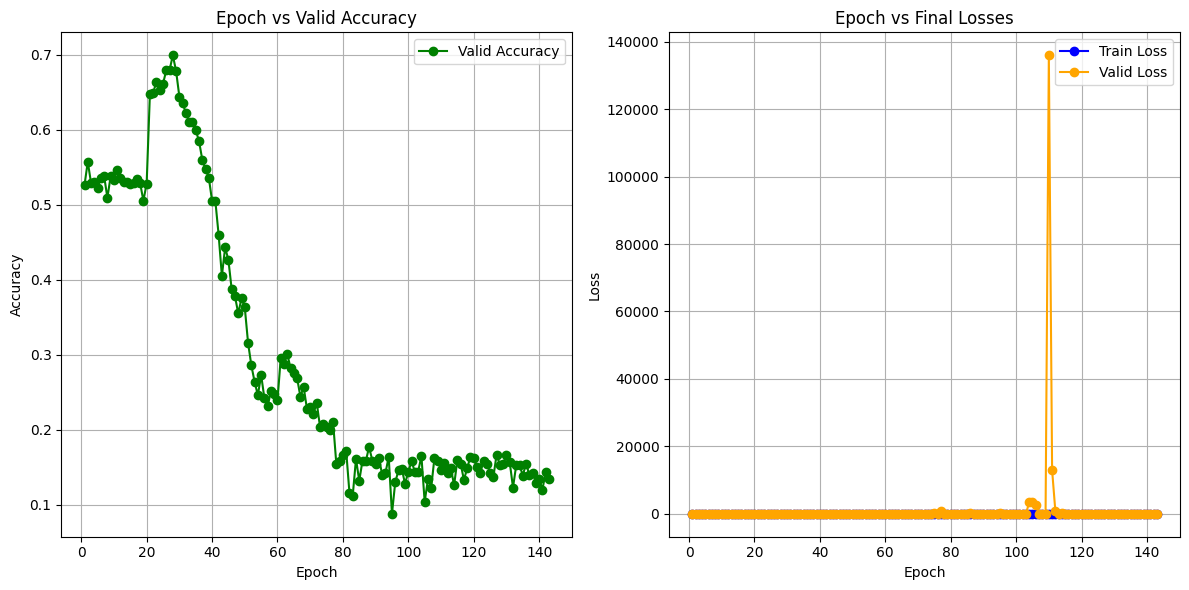

In [10]:
from logging import NullHandler
import re
import matplotlib.pyplot as plt

# Initialize empty lists
epochs = []
valid_accuracies = []
train_losses = []
valid_losses = []
separate_loss = []
lang_loss = []

# Read and parse the log file
with open('/content/results/convtasnet/1234/train_log.txt', 'r') as file:
  epoch_match = None
  train_loss_match = None
  valid_loss_match = None
  acc_match = None
  for line in file:
      # Use regular expressions to extract values
      if(epoch_match == None):
        epoch_match = re.search(r'epoch: (\d+)', line)
      if(acc_match == None):
        acc_match = re.search(r'valid Accuracy Partial: ([\deE\+\-\.]+)', line)
      if(train_loss_match == None):
        train_loss_match = re.search(r'train final_loss: ([\deE\+\-\.]+)', line)
      if(valid_loss_match == None):
        valid_loss_match = re.search(r'valid final_loss: ([\deE\+\-\.]+)', line)
      # print(valid_loss_match)
      # separate_loss_match = re.search(r'valid separate_loss: ([\deE\+\-\.]+)', line)
      # lang_loss_match = re.search(r'valid lang_loss: ([\deE\+\-\.]+)', line)

      if epoch_match and train_loss_match and valid_loss_match :
          epochs.append(int(epoch_match.group(1)))
          valid_accuracies.append(float(acc_match.group(1)))
          train_losses.append(float(train_loss_match.group(1)))
          valid_losses.append(float(valid_loss_match.group(1)))
          epoch_match = None
          train_loss_match = None
          valid_loss_match = None

          acc_match = None

print(train_losses)
print(valid_losses)
print(valid_accuracies)
# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, valid_accuracies, marker='o', label='Valid Accuracy', color='green')
plt.title("Epoch vs Valid Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_losses, marker='o', label='Train Loss', color='blue')
plt.plot(epochs, valid_losses, marker='o', label='Valid Loss', color='orange')
# plt.plot(epochs, separate_loss, marker='o', label='Separate Loss', color='red')
# plt.plot(epochs, lang_loss, marker='o', label='Lang Loss', color='purple')
plt.title("Epoch vs Final Losses")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

Evaluate

In [11]:
# Eval
separator.evaluate( test_data, min_key="si-snr")

speechbrain.utils.checkpoints - Would load a checkpoint here, but none found yet.
Delta lang loss = 0.2, Delta separate loss = 0.8


100%|██████████| 750/750 [00:55<00:00, 13.54it/s]

speechbrain.utils.train_logger - Epoch loaded: 144 - test final_loss: 5.57e+02, test Accuracy soft: 0.07627981901168823, test Accuracy Partial: 0.14266666769981384


557.2297070588596

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
separator.save_results(test_data)

End Run

In [ ]:
!rm -rf /content/results
# !cp -r /content/results /content/drive/MyDrive/Project/
# !cp -r /content/hparams/conVasNet.yml /content/drive/MyDrive/Project/results/

In [ ]:
from google.colab import runtime
runtime.unassign()

In [ ]:
!cp /content/hparams/conVasNet_p.yml /content/drive/MyDrive/Project

In [ ]:
# import torch
# import torch.nn as nn
# # from speechbrain.nnet.losses import PitWrapper
# # pit_bceeee = PitWrapper(nn.NLLLoss(reduction ='none'))
# loss_1 = nn.CrossEntropyLoss(reduction = 'none')
# loss_2 = nn.CrossEntropyLoss(reduction='mean')
# n = 0
# while n!=100:
#   input = torch.randn(1,2, 16, requires_grad=True)
#   target = torch.empty(1,2,16, dtype=torch.long).random_(1)
#   target[0][1][5] = 1
#   target[0][0][8] = 1
#   input = input.squeeze(0)
#   target = target.squeeze(0)
#   targets = (target == 1).nonzero(as_tuple=False)
#   input_first, input_second = torch.chunk(input, chunks = 2, dim=0)
#   target_first, target_second = torch.chunk(targets, chunks = 2, dim=0)
#   target_first = target_first.squeeze(0)[1:]
#   target_second = target_second.squeeze(0)[1:]
#   # print(type(input_first),target_first,target_second)
#   lang_loss = 0.5*torch.min(torch.stack([(loss_1(input_first,target_first)+loss_1(input_second,target_second)), (loss_1(input_first,target_second)+loss_1(input_second,target_first))]))
#   # print(lang_loss)
#   target_2 = target.argmax(dim = 1)
#   # print(input,target_2,target_2.flip(0))
#   lang_loss_2 = torch.min(torch.stack([loss_2(input,target_2),loss_2(input,target_2.flip(0))]))
#   # print(lang_loss_2)
#   if(lang_loss != lang_loss_2):
#     print(f"Different for {input}")
#   n = n +1